In [1]:
def confusion_matrix_article(Y,Z):
    print(type(Y),type(Z))
    
    
    np.seterr(divide='ignore', invalid='ignore')
    #print(np.diag(Y[0]))
    #print(sum(Z[0]))
    M = np.zeros((Y.shape[1],Y.shape[1]))
    W = np.zeros(Y.shape[1])
    print("M is ", M.shape)
    for i in range(len(Y)):
        if(np.allclose(Y[i],Z[i])):
            print(i, " - Y and Z are equal")
            C = np.diag(Y[i])
            print(C.shape)
        else:
            Y_complement_Z = np.where((Y[i]-Z[i])<0, 0, (Y[i]-Z[i]))
            print("|Yi\Zi| = ",sum(Y_complement_Z), ", shape = ", Y_complement_Z.shape)
            Z_complement_Y = np.where((Z[1]-Y[1])<0, 0, (Z[1]-Y[1]))
            print("|Zi\Yi| = ", sum(Z_complement_Y), ", shape = ", Y_complement_Z.shape)
            #Y_intersect_Z = (Y[i] & Z[i])
            
            for j in range(Y.shape[1]):
                if(Y[i][j]==Z[i][j]):
                    W[j]=Y[i][j]
                else:
                    W[j]=0
            
            Y_intersect_Z = W
            #### it will be a 861 x 861 matrix
            if (sum(Y_complement_Z)==0):  #if |Yi\Zi|=0
                # 𝐶=[(𝑌i∩𝑍i)⊗(𝑍i\𝑌i)+|𝑌i|⋅𝑑𝑖𝑎𝑔(𝑌i)]/|𝑍i|
                C1 = np.kron(Y_intersect_Z,Z_complement_Y)
                C2 = np.dot(sum(Y[i]),np.diag(Y[i]))
                C1 = C1.reshape(Y.shape[1],Y.shape[1]) 
                C = (C1+C2)/sum(Z[i])
            elif (sum(Z_complement_Y)==0):
                print("i = ", i)
                print("condiçao |Zi\Yi| =  0")
                print("kron:", np.kron(Y_complement_Z,Z[i]))
                C1 = np.kron(Y_complement_Z,Z[i])/sum(Z[i])
                if (np.isnan(np.min(C1))):
                    print("Tem nan em C1")
                    C1[np.isnan(C1)] = 0
                print("C1 = ", C1)
                C2 = np.diag(Z[i])
                if (np.isnan(np.min(C2))):
                    print("Tem nan em C1")
                    C2[np.isnan(C2)] = 0
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            else:
                print("condiçao |Zi\Yi| diferente de 0")
                C1 = np.kron(Y_complement_Z,Z_complement_Y)/sum(Z_complement_Y)
                C2 = np.diag(Y_intersect_Z)
                C1 = C1.reshape(Y.shape[1],Y.shape[1])
                C = C1+C2
            print(C)
            M = M + C
    print("M = ", M)
    return M

In [2]:
def precision_matrix(M):
    #print(M.shape[0])
    rows = M.shape[0]
    columns = M.shape[1]
    sum_column = M.sum(axis=0)
    sum_row = M.sum(axis=1)
    precision_M = np.zeros((columns,rows))
    
    for i in range(columns):
        for j in range(rows):
            #print("sum_column[",i,"] = ",sum_column[i])
            #print("M[",j,"][",i,"] = ", M[j][i] )
            precision_M[j][i]= (M[j][i])/(sum_column[i])
            #print("precision_M[",j,"][",i,"] = ", precision_M[j][i] )
    
    if (np.isnan(np.min(precision_M))):
                    precision_M[np.isnan(precision_M)] = 0
    
    print("precision_M = ", precision_M)
    
    return precision_M

In [3]:
from IPython.display import display
!conda info


     active environment : tese
    active env location : /Users/marcelo_palermo/anaconda3/envs/tese
            shell level : 2
       user config file : /Users/marcelo_palermo/.condarc
 populated config files : /Users/marcelo_palermo/.condarc
          conda version : 23.5.0
    conda-build version : 3.25.0
         python version : 3.10.11.final.0
       virtual packages : __archspec=1=x86_64
                          __osx=10.16=0
                          __unix=0=0
       base environment : /Users/marcelo_palermo/anaconda3  (writable)
      conda av data dir : /Users/marcelo_palermo/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
     

In [4]:
def separate_proteins(filename):
    
    
    training_dataset = pd.read_csv(filename)
    print("Original Data for " + filename)
    display(training_dataset.head(10))
    display(training_dataset.shape)
    #Drop unnecessary columns
    # training_dataset = training_dataset.drop(['Unnamed: 0','Threshold','Desc','OlinkID','UniProt','Panel','Organ','Desc_Column','term','df','sumsq','meansq','statistic'], axis=1)
    training_dataset = training_dataset.drop(['Unnamed: 0','Threshold','OlinkID','UniProt','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    display(training_dataset.head(10))
    display(training_dataset.shape)
    
    
    training_dataframe = pd.DataFrame()
    validation_dataframe = pd.DataFrame()
    
    if(filename.find('train')>0):
        print('This is training file')
        if training_dataframe.empty:
            training_dataframe = training_dataset
            print('creating empty dataframe and placing training_dataset into it')
            
        
        
    else: 
        print('This is validation file')
    
    
    display(training_dataframe.head(10))
    
    return list(training_dataset['Assay'].values)
    

In [5]:
def build_ML_data_prep (filename,df,age):
    print("Processing file " + filename)
    training_dataset1 = pd.read_csv(filename)
    for protein in training_dataset1['Assay']:
        #print(protein)
        if protein in df.columns:
            df.loc[df['BMI']==age, [protein]] = 1
        else:
            df.loc[df['BMI']==age, [protein]] = 0
    display(df.head())
    return(df)
    
    

In [6]:
import pandas as pd
import numpy as np
import re

### Read MGH Olink ANOVA dataset for the referred category

In [7]:
category = ['age','BMI']
category_range_age = range(1,6)
category_range_BMI = range(0,5)

In [8]:
for i in category_range_age:
    print("Age category:", category_range_age[i-1])
print("\r")
for i in category_range_BMI:
    print("BMI category:", category_range_BMI[i])

Age category: 1
Age category: 2
Age category: 3
Age category: 4
Age category: 5

BMI category: 0
BMI category: 1
BMI category: 2
BMI category: 3
BMI category: 4


In [9]:
import glob, os
files_to_prepare = []
files_to_prepare_train = []

split_factor_file_train = "60_40"
split_factor_file_validation = "60_40"

listing = glob.glob('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/' + split_factor_file_train + '/MGH_ANOVA_BMI_categories_train_Age_*.csv')
for filename in listing:
    if "cut" in filename:
        print("NOT INCLUDED - Found cut in ", filename)
    else:
        print(filename)
        files_to_prepare.append(filename)
        
## BMI Category 5 training & validation is Unknown --> Discarded
## BMI Category 1 training is empty --> discarded

files_to_prepare.sort()

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_3.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_4.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_2.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_2_cut.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_1.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_2.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_2_cut.csv
/Users/marcelo_palermo/Doutorado/R/Olink/Next

In [10]:
files_to_prepare

['/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_4.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/M

In [11]:
len(files_to_prepare)

20

### We load validation files just to capture ALL proteins
- Some proteins will appear only in validation
- Some proteins will appear only in train
- We need to ensure ALL columns for Age will be the same in validation and train sets

In [12]:
files_to_prepare_train = files_to_prepare
files_to_prepare_validation = []

listing = glob.glob('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/' + split_factor_file_validation + '/MGH_ANOVA_BMI_categories_validation_Age_*.csv')
for filename in listing:
    if "cut" in filename:
        print("NOT INCLUDED - Found cut in ", filename)
    else:
        print(filename)
        files_to_prepare_validation.append(filename)
        
        
        
## BMI Category 5 training & validation is Unknown --> Discarded
## BMI Category 1 training is empty --> discarded

files_to_prepare_validation.sort()

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_3.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_2.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_1.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_2.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_4.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_3.csv
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_1.csv
NOT INCLUDED - Found cut in  /Users/marcelo_palermo/Doutorado/R/Olink/NextSt

In [13]:
files_to_prepare + files_to_prepare_validation

['/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_4.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_1.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_2.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_3.csv',
 '/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/M

In [14]:
array_protein_names = []
array_each_file = []
for file in (files_to_prepare + files_to_prepare_validation):
    array_each_file = separate_proteins(file)
    array_protein_names = array_protein_names + array_each_file

Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PPCDC,OID21027,Q96CD2,Neurology,Timepoint,2,2.389595,1.194798,282.276043,0.000007,0.010629,Significant,Low tissue specificity,Phosphopantothenoylcysteine decarboxylase,Low_tissue_specificity


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PPCDC,0.000007,0.010629,Low tissue specificity,Phosphopantothenoylcysteine decarboxylase,Low_tissue_specificity


(1, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PPCDC,0.000007,0.010629,Low tissue specificity,Phosphopantothenoylcysteine decarboxylase,Low_tissue_specificity


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,CALB1,OID21306,P05937,Oncology,Timepoint,3,14.724892,4.908297,124.703714,4.688493e-07,0.000690,Significant,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,2,MMP7,OID20087,P09237,Cardiometabolic,Timepoint,3,8.303126,2.767709,78.368740,2.847616e-06,0.002096,Significant,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...
2,3,HAVCR1,OID21422,Q96D42,Oncology,Timepoint,3,46.446984,15.482328,54.801469,1.119565e-05,0.003296,Significant,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,4,TNFRSF14,OID20783,Q92956,Inflammation,Timepoint,3,5.546741,1.848914,61.250761,7.330344e-06,0.003296,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
4,5,TNFRSF4,OID20653,P43489,Inflammation,Timepoint,3,6.303672,2.101224,56.897272,9.707754e-06,0.003296,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,6,FAS,OID20316,P25445,Cardiometabolic,Timepoint,3,4.931762,1.643921,46.895423,2.017523e-05,0.004950,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
6,7,IGFBP4,OID21158,P22692,Neurology,Timepoint,3,7.440600,2.480200,42.055594,3.035718e-05,0.004965,Significant,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
7,8,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,35.744616,11.914872,44.444619,2.468357e-05,0.004965,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
8,9,WFDC2,OID21505,Q14508,Oncology,Timepoint,3,12.392155,4.130718,42.414764,2.940711e-05,0.004965,Significant,"Tissue enhanced: cervix, salivary gland",WAP four-disulfide core domain protein 2,Tissue_enhanced_cervix_salivary_gland
9,10,EREG,OID20905,O14944,Neurology,Timepoint,3,10.752935,3.584312,40.006634,3.657699e-05,0.005073,Significant,Tissue enriched: bone marrow,Proepiregulin,Tissue_enriched_bone_marrow


(150, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CALB1,4.688493e-07,0.000690,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,MMP7,2.847616e-06,0.002096,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...
2,HAVCR1,1.119565e-05,0.003296,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,TNFRSF14,7.330344e-06,0.003296,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
4,TNFRSF4,9.707754e-06,0.003296,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,FAS,2.017523e-05,0.004950,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
6,IGFBP4,3.035718e-05,0.004965,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
7,SDC1,2.468357e-05,0.004965,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
8,WFDC2,2.940711e-05,0.004965,"Tissue enhanced: cervix, salivary gland",WAP four-disulfide core domain protein 2,Tissue_enhanced_cervix_salivary_gland
9,EREG,3.657699e-05,0.005073,Tissue enriched: bone marrow,Proepiregulin,Tissue_enriched_bone_marrow


(150, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CALB1,4.688493e-07,0.000690,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,MMP7,2.847616e-06,0.002096,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...
2,HAVCR1,1.119565e-05,0.003296,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,TNFRSF14,7.330344e-06,0.003296,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
4,TNFRSF4,9.707754e-06,0.003296,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,FAS,2.017523e-05,0.004950,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
6,IGFBP4,3.035718e-05,0.004965,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
7,SDC1,2.468357e-05,0.004965,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
8,WFDC2,2.940711e-05,0.004965,"Tissue enhanced: cervix, salivary gland",WAP four-disulfide core domain protein 2,Tissue_enhanced_cervix_salivary_gland
9,EREG,3.657699e-05,0.005073,Tissue enriched: bone marrow,Proepiregulin,Tissue_enriched_bone_marrow


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,NPDC1,OID20205,Q9NQX5,Cardiometabolic,Timepoint,2,1.307134,0.653567,987.057004,0.000004,0.006019,Significant,Low tissue specificity,Neural proliferation differentiation and contr...,Low_tissue_specificity
1,2,APOH,OID21072,P02749,Neurology,Timepoint,2,5.697220,2.848610,656.878631,0.000009,0.006782,Significant,Tissue enriched: liver,Beta-2-glycoprotein 1,Tissue_enriched_liver


(2, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,NPDC1,0.000004,0.006019,Low tissue specificity,Neural proliferation differentiation and contr...,Low_tissue_specificity
1,APOH,0.000009,0.006782,Tissue enriched: liver,Beta-2-glycoprotein 1,Tissue_enriched_liver


(2, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,NPDC1,0.000004,0.006019,Low tissue specificity,Neural proliferation differentiation and contr...,Low_tissue_specificity
1,APOH,0.000009,0.006782,Tissue enriched: liver,Beta-2-glycoprotein 1,Tissue_enriched_liver


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,CLC,OID20126,Q05315,Cardiometabolic,Timepoint,3,11.024728,3.674909,14.489989,0.000030,0.016013,Significant,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow
1,2,FKBP1B,OID20618,P68106,Inflammation,Timepoint,3,4.219121,1.406374,16.015169,0.000015,0.016013,Significant,Tissue enhanced: brain,Peptidyl-prolyl cis-trans isomerase FKBP1B,Tissue_enhanced_brain
2,3,LYAR,OID21264,Q9NX58,Oncology,Timepoint,3,7.304673,2.434891,14.320570,0.000033,0.016013,Significant,Tissue enriched: testis,Cell growth-regulating nucleolar protein,Tissue_enriched_testis
3,4,APLP1,OID20164,P51693,Cardiometabolic,Timepoint,3,5.637822,1.879274,12.436392,0.000082,0.024113,Significant,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain
4,5,TMPRSS15,OID21364,P98073,Oncology,Timepoint,3,6.275222,2.091741,12.497030,0.000079,0.024113,Significant,Tissue enriched: intestine,Enteropeptidase,Tissue_enriched_intestine
5,6,MMP7,OID20087,P09237,Cardiometabolic,Timepoint,3,7.588035,2.529345,10.825782,0.000193,0.047431,Significant,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...


(6, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CLC,0.000030,0.016013,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow
1,FKBP1B,0.000015,0.016013,Tissue enhanced: brain,Peptidyl-prolyl cis-trans isomerase FKBP1B,Tissue_enhanced_brain
2,LYAR,0.000033,0.016013,Tissue enriched: testis,Cell growth-regulating nucleolar protein,Tissue_enriched_testis
3,APLP1,0.000082,0.024113,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain
4,TMPRSS15,0.000079,0.024113,Tissue enriched: intestine,Enteropeptidase,Tissue_enriched_intestine
5,MMP7,0.000193,0.047431,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...


(6, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CLC,0.000030,0.016013,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow
1,FKBP1B,0.000015,0.016013,Tissue enhanced: brain,Peptidyl-prolyl cis-trans isomerase FKBP1B,Tissue_enhanced_brain
2,LYAR,0.000033,0.016013,Tissue enriched: testis,Cell growth-regulating nucleolar protein,Tissue_enriched_testis
3,APLP1,0.000082,0.024113,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain
4,TMPRSS15,0.000079,0.024113,Tissue enriched: intestine,Enteropeptidase,Tissue_enriched_intestine
5,MMP7,0.000193,0.047431,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,IFNL1,OID20795,Q8IU54,Neurology,Timepoint,2,27.275483,13.637742,20.154416,0.000002,0.003186,Significant,Not detected,Interferon lambda-1,Not_detected
1,2,CXCL10,OID20697,P02778,Inflammation,Timepoint,2,29.701542,14.850771,15.824722,0.000017,0.008111,Significant,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
2,3,IFNG,OID20495,P01579,Inflammation,Timepoint,2,77.592940,38.796470,15.405585,0.000021,0.008111,Significant,"Group enriched: bone marrow, lymphoid tissue",Interferon gamma,Group_enriched_bone_marrow_lymphoid_tissue
3,4,TNFSF13B,OID20272,Q9Y275,Cardiometabolic,Timepoint,2,9.899833,4.949916,15.272864,0.000022,0.008111,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor ligand superfamily membe...,Tissue_enhanced_lymphoid_tissue
4,5,FAP,OID20330,Q12884,Cardiometabolic,Timepoint,2,0.905740,0.452870,14.653708,0.000030,0.008936,Significant,"Tissue enhanced: endometrium 1, smooth muscle",Prolyl endopeptidase FAP,Tissue_enhanced_endometrium_1_smooth_muscle
5,6,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,2,28.231364,14.115682,14.024703,0.000042,0.010376,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,7,ENPP5,OID20736,Q9UJA9,Inflammation,Timepoint,2,3.103273,1.551637,13.684979,0.000051,0.010669,Significant,Tissue enriched: epididymis,Ectonucleotide pyrophosphatase/phosphodiestera...,Tissue_enriched_epididymis
7,8,ANGPTL1,OID20211,O95841,Cardiometabolic,Timepoint,2,7.226607,3.613303,13.237917,0.000065,0.011901,Significant,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
8,9,C1QA,OID20654,P02745,Inflammation,Timepoint,2,9.221311,4.610656,12.351266,0.000106,0.017315,Significant,Tissue enhanced: lymphoid tissue,Complement C1q subcomponent subunit A,Tissue_enhanced_lymphoid_tissue
9,10,CSF3,OID20491,P09919,Inflammation,Timepoint,2,8.836745,4.418372,11.293341,0.000195,0.028637,Significant,"Tissue enhanced: lung, urinary bladder",Granulocyte colony-stimulating factor,Tissue_enhanced_lung_urinary_bladder


(13, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,IFNL1,0.000002,0.003186,Not detected,Interferon lambda-1,Not_detected
1,CXCL10,0.000017,0.008111,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
2,IFNG,0.000021,0.008111,"Group enriched: bone marrow, lymphoid tissue",Interferon gamma,Group_enriched_bone_marrow_lymphoid_tissue
3,TNFSF13B,0.000022,0.008111,Tissue enhanced: lymphoid tissue,Tumor necrosis factor ligand superfamily membe...,Tissue_enhanced_lymphoid_tissue
4,FAP,0.000030,0.008936,"Tissue enhanced: endometrium 1, smooth muscle",Prolyl endopeptidase FAP,Tissue_enhanced_endometrium_1_smooth_muscle
5,SDC1,0.000042,0.010376,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,ENPP5,0.000051,0.010669,Tissue enriched: epididymis,Ectonucleotide pyrophosphatase/phosphodiestera...,Tissue_enriched_epididymis
7,ANGPTL1,0.000065,0.011901,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
8,C1QA,0.000106,0.017315,Tissue enhanced: lymphoid tissue,Complement C1q subcomponent subunit A,Tissue_enhanced_lymphoid_tissue
9,CSF3,0.000195,0.028637,"Tissue enhanced: lung, urinary bladder",Granulocyte colony-stimulating factor,Tissue_enhanced_lung_urinary_bladder


(13, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,IFNL1,0.000002,0.003186,Not detected,Interferon lambda-1,Not_detected
1,CXCL10,0.000017,0.008111,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
2,IFNG,0.000021,0.008111,"Group enriched: bone marrow, lymphoid tissue",Interferon gamma,Group_enriched_bone_marrow_lymphoid_tissue
3,TNFSF13B,0.000022,0.008111,Tissue enhanced: lymphoid tissue,Tumor necrosis factor ligand superfamily membe...,Tissue_enhanced_lymphoid_tissue
4,FAP,0.000030,0.008936,"Tissue enhanced: endometrium 1, smooth muscle",Prolyl endopeptidase FAP,Tissue_enhanced_endometrium_1_smooth_muscle
5,SDC1,0.000042,0.010376,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,ENPP5,0.000051,0.010669,Tissue enriched: epididymis,Ectonucleotide pyrophosphatase/phosphodiestera...,Tissue_enriched_epididymis
7,ANGPTL1,0.000065,0.011901,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
8,C1QA,0.000106,0.017315,Tissue enhanced: lymphoid tissue,Complement C1q subcomponent subunit A,Tissue_enhanced_lymphoid_tissue
9,CSF3,0.000195,0.028637,"Tissue enhanced: lung, urinary bladder",Granulocyte colony-stimulating factor,Tissue_enhanced_lung_urinary_bladder


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,GLT8D2,OID20825,Q9H1C3,Neurology,Timepoint,3,3.200022,1.066674,66.072753,2.541238e-07,0.000374,Significant,Low tissue specificity,Glycosyltransferase 8 domain-containing protein 2,Low_tissue_specificity


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,GLT8D2,2.541238e-07,0.000374,Low tissue specificity,Glycosyltransferase 8 domain-containing protein 2,Low_tissue_specificity


(1, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,GLT8D2,2.541238e-07,0.000374,Low tissue specificity,Glycosyltransferase 8 domain-containing protein 2,Low_tissue_specificity


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,TNFRSF4,OID20653,P43489,Inflammation,Timepoint,3,24.209337,8.069779,22.310421,1.411968e-08,0.000021,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
1,2,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,82.985313,27.661771,21.038360,2.858382e-08,0.000021,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,3,SCARF1,OID20297,Q14162,Cardiometabolic,Timepoint,3,15.703292,5.234431,20.087786,4.924879e-08,0.000024,Significant,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
3,4,TNFRSF9,OID20985,Q07011,Neurology,Timepoint,3,20.577053,6.859018,18.304672,1.425670e-07,0.000052,Significant,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
4,5,CCL14,OID20401,Q16627,Cardiometabolic,Timepoint,3,11.656112,3.885371,14.035619,2.354917e-06,0.000693,Significant,Tissue enhanced: lymphoid tissue,C-C motif chemokine 14,Tissue_enhanced_lymphoid_tissue
5,6,RELT,OID21142,Q969Z4,Neurology,Timepoint,3,18.000366,6.000122,13.006522,4.934566e-06,0.001211,Significant,Tissue enriched: bone marrow,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_bone_marrow
6,7,CCL16,OID20334,O15467,Cardiometabolic,Timepoint,3,29.735224,9.911741,11.280194,1.821534e-05,0.001998,Significant,Tissue enriched: liver,C-C motif chemokine 16,Tissue_enriched_liver
7,8,COL6A3,OID20292,P12111,Cardiometabolic,Timepoint,3,34.857842,11.619281,11.829860,1.190694e-05,0.001998,Significant,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
8,9,EDA2R,OID21451,Q9HAV5,Oncology,Timepoint,3,28.726947,9.575649,11.031935,2.213744e-05,0.001998,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,10,ESAM,OID20270,Q96AP7,Cardiometabolic,Timepoint,3,7.583281,2.527760,10.910892,2.436234e-05,0.001998,Significant,Low tissue specificity,Endothelial cell-selective adhesion molecule,Low_tissue_specificity


(383, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,TNFRSF4,1.411968e-08,0.000021,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
1,SDC1,2.858382e-08,0.000021,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SCARF1,4.924879e-08,0.000024,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
3,TNFRSF9,1.425670e-07,0.000052,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
4,CCL14,2.354917e-06,0.000693,Tissue enhanced: lymphoid tissue,C-C motif chemokine 14,Tissue_enhanced_lymphoid_tissue
5,RELT,4.934566e-06,0.001211,Tissue enriched: bone marrow,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_bone_marrow
6,CCL16,1.821534e-05,0.001998,Tissue enriched: liver,C-C motif chemokine 16,Tissue_enriched_liver
7,COL6A3,1.190694e-05,0.001998,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
8,EDA2R,2.213744e-05,0.001998,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,ESAM,2.436234e-05,0.001998,Low tissue specificity,Endothelial cell-selective adhesion molecule,Low_tissue_specificity


(383, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,TNFRSF4,1.411968e-08,0.000021,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
1,SDC1,2.858382e-08,0.000021,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SCARF1,4.924879e-08,0.000024,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
3,TNFRSF9,1.425670e-07,0.000052,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
4,CCL14,2.354917e-06,0.000693,Tissue enhanced: lymphoid tissue,C-C motif chemokine 14,Tissue_enhanced_lymphoid_tissue
5,RELT,4.934566e-06,0.001211,Tissue enriched: bone marrow,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_bone_marrow
6,CCL16,1.821534e-05,0.001998,Tissue enriched: liver,C-C motif chemokine 16,Tissue_enriched_liver
7,COL6A3,1.190694e-05,0.001998,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
8,EDA2R,2.213744e-05,0.001998,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,ESAM,2.436234e-05,0.001998,Low tissue specificity,Endothelial cell-selective adhesion molecule,Low_tissue_specificity


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PTK7,OID20880,Q13308,Neurology,Timepoint,3,37.764178,12.588059,54.152412,1.382779e-15,2.035451e-12,Significant,Low tissue specificity,Inactive tyrosine-protein kinase 7,Low_tissue_specificity
1,2,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,82.208408,27.402803,25.055636,5.711074e-10,4.203351e-07,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,3,ITGA11,OID20581,Q9UKX5,Inflammation,Timepoint,3,12.099051,4.033017,15.598016,2.976430e-07,1.460435e-04,Significant,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
3,4,NEFL,OID20871,P07196,Neurology,Timepoint,3,53.254119,17.751373,14.950902,4.865772e-07,1.790604e-04,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
4,5,CCL24,OID20772,O00175,Inflammation,Timepoint,3,31.219319,10.406440,12.886839,2.496654e-06,6.125123e-04,Significant,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
5,6,MSLN,OID21380,Q13421,Oncology,Timepoint,3,21.844179,7.281393,12.978396,2.316635e-06,6.125123e-04,Significant,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
6,7,CA6,OID21096,P23280,Neurology,Timepoint,3,9.065145,3.021715,12.131197,4.670167e-06,9.820694e-04,Significant,Tissue enriched: salivary gland,Carbonic anhydrase 6,Tissue_enriched_salivary_gland
7,8,CPB1,OID20289,P15086,Cardiometabolic,Timepoint,3,30.329800,10.109933,11.875524,5.792944e-06,1.065902e-03,Significant,Tissue enriched: pancreas,Carboxypeptidase B,Tissue_enriched_pancreas
8,9,CELA3A,OID20298,P09093,Cardiometabolic,Timepoint,3,28.591538,9.530513,11.624912,7.167898e-06,1.172350e-03,Significant,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
9,10,CXCL17,OID20622,Q6UXB2,Inflammation,Timepoint,3,8.260634,2.753545,11.219966,1.015080e-05,1.393030e-03,Significant,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...


(130, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTK7,1.382779e-15,2.035451e-12,Low tissue specificity,Inactive tyrosine-protein kinase 7,Low_tissue_specificity
1,SDC1,5.711074e-10,4.203351e-07,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,ITGA11,2.976430e-07,1.460435e-04,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
3,NEFL,4.865772e-07,1.790604e-04,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
4,CCL24,2.496654e-06,6.125123e-04,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
5,MSLN,2.316635e-06,6.125123e-04,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
6,CA6,4.670167e-06,9.820694e-04,Tissue enriched: salivary gland,Carbonic anhydrase 6,Tissue_enriched_salivary_gland
7,CPB1,5.792944e-06,1.065902e-03,Tissue enriched: pancreas,Carboxypeptidase B,Tissue_enriched_pancreas
8,CELA3A,7.167898e-06,1.172350e-03,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
9,CXCL17,1.015080e-05,1.393030e-03,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...


(130, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PTK7,1.382779e-15,2.035451e-12,Low tissue specificity,Inactive tyrosine-protein kinase 7,Low_tissue_specificity
1,SDC1,5.711074e-10,4.203351e-07,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,ITGA11,2.976430e-07,1.460435e-04,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
3,NEFL,4.865772e-07,1.790604e-04,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
4,CCL24,2.496654e-06,6.125123e-04,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
5,MSLN,2.316635e-06,6.125123e-04,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
6,CA6,4.670167e-06,9.820694e-04,Tissue enriched: salivary gland,Carbonic anhydrase 6,Tissue_enriched_salivary_gland
7,CPB1,5.792944e-06,1.065902e-03,Tissue enriched: pancreas,Carboxypeptidase B,Tissue_enriched_pancreas
8,CELA3A,7.167898e-06,1.172350e-03,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
9,CXCL17,1.015080e-05,1.393030e-03,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,DLK1,OID20295,P80370,Cardiometabolic,Timepoint,3,23.141815,7.713938,16.728879,8.266303e-08,0.000061,Significant,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,2,SPON1,OID20759,Q9HCB6,Inflammation,Timepoint,3,34.401980,11.467327,16.931126,7.087225e-08,0.000061,Significant,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
2,3,FOLR1,OID21529,P15328,Oncology,Timepoint,3,7.998477,2.666159,13.375819,1.211545e-06,0.000357,Significant,"Tissue enhanced: choroid plexus, fallopian tub...",Folate receptor alpha,Tissue_enhanced_choroid_plexus_fallopian_tube_...
3,4,GPC1,OID21438,P35052,Oncology,Timepoint,3,19.691882,6.563961,13.458111,1.130651e-06,0.000357,Significant,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
4,5,SCARF2,OID21048,Q96GP6,Neurology,Timepoint,3,6.362564,2.120855,13.863133,8.066737e-07,0.000357,Significant,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
5,6,CLSTN2,OID20664,Q9H4D0,Inflammation,Timepoint,3,14.161773,4.720591,12.552502,2.442091e-06,0.000386,Significant,"Group enriched: adipose tissue, brain, ovary",Calsyntenin-2,Group_enriched_adipose_tissue_brain_ovary
6,7,DSC2,OID21079,Q02487,Neurology,Timepoint,3,18.984052,6.328017,12.647524,2.250270e-06,0.000386,Significant,"Tissue enhanced: esophagus, vagina",Desmocollin-2,Tissue_enhanced_esophagus_vagina
7,8,FCER2,OID21133,P06734,Neurology,Timepoint,3,22.589455,7.529818,12.984500,1.686852e-06,0.000386,Significant,Tissue enriched: lymphoid tissue,Low affinity immunoglobulin epsilon Fc receptor,Tissue_enriched_lymphoid_tissue
8,9,NEFL,OID20871,P07196,Neurology,Timepoint,3,49.967173,16.655724,12.377436,2.841116e-06,0.000386,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,10,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,164.194202,54.731401,12.574414,2.396403e-06,0.000386,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


(328, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DLK1,8.266303e-08,0.000061,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,SPON1,7.087225e-08,0.000061,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
2,FOLR1,1.211545e-06,0.000357,"Tissue enhanced: choroid plexus, fallopian tub...",Folate receptor alpha,Tissue_enhanced_choroid_plexus_fallopian_tube_...
3,GPC1,1.130651e-06,0.000357,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
4,SCARF2,8.066737e-07,0.000357,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
5,CLSTN2,2.442091e-06,0.000386,"Group enriched: adipose tissue, brain, ovary",Calsyntenin-2,Group_enriched_adipose_tissue_brain_ovary
6,DSC2,2.250270e-06,0.000386,"Tissue enhanced: esophagus, vagina",Desmocollin-2,Tissue_enhanced_esophagus_vagina
7,FCER2,1.686852e-06,0.000386,Tissue enriched: lymphoid tissue,Low affinity immunoglobulin epsilon Fc receptor,Tissue_enriched_lymphoid_tissue
8,NEFL,2.841116e-06,0.000386,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,PTN,2.396403e-06,0.000386,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


(328, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DLK1,8.266303e-08,0.000061,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,SPON1,7.087225e-08,0.000061,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
2,FOLR1,1.211545e-06,0.000357,"Tissue enhanced: choroid plexus, fallopian tub...",Folate receptor alpha,Tissue_enhanced_choroid_plexus_fallopian_tube_...
3,GPC1,1.130651e-06,0.000357,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
4,SCARF2,8.066737e-07,0.000357,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
5,CLSTN2,2.442091e-06,0.000386,"Group enriched: adipose tissue, brain, ovary",Calsyntenin-2,Group_enriched_adipose_tissue_brain_ovary
6,DSC2,2.250270e-06,0.000386,"Tissue enhanced: esophagus, vagina",Desmocollin-2,Tissue_enhanced_esophagus_vagina
7,FCER2,1.686852e-06,0.000386,Tissue enriched: lymphoid tissue,Low affinity immunoglobulin epsilon Fc receptor,Tissue_enriched_lymphoid_tissue
8,NEFL,2.841116e-06,0.000386,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,PTN,2.396403e-06,0.000386,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_0.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,DKK1,OID21066,O94907,Neurology,Timepoint,3,9.914504,3.304835,48.258596,0.000003,0.004364,Significant,"Tissue enhanced: cervix, placenta, urinary bla...",Dickkopf-related protein 1,Tissue_enhanced_cervix_placenta_urinary_bladder


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DKK1,0.000003,0.004364,"Tissue enhanced: cervix, placenta, urinary bla...",Dickkopf-related protein 1,Tissue_enhanced_cervix_placenta_urinary_bladder


(1, 6)

This is training file
creating empty dataframe and placing training_dataset into it


,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,DKK1,0.000003,0.004364,"Tissue enhanced: cervix, placenta, urinary bla...",Dickkopf-related protein 1,Tissue_enhanced_cervix_placenta_urinary_bladder


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_1_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,PADI2,OID20467,Q9Y2J8,Inflammation,Timepoint,3,31.843357,10.614452,35.941984,3.012995e-08,0.000044,Significant,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,2,MMP13,OID20807,P45452,Neurology,Timepoint,3,3.369174,1.123058,21.494691,1.811811e-06,0.000889,Significant,Tissue enriched: urinary bladder,Collagenase 3,Tissue_enriched_urinary_bladder
2,3,PDCD1,OID21396,Q15116,Oncology,Timepoint,3,7.438245,2.479415,21.839659,1.606781e-06,0.000889,Significant,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
3,4,CD83,OID20565,Q01151,Inflammation,Timepoint,3,4.959231,1.653077,19.310659,4.014501e-06,0.001477,Significant,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
4,5,ANGPTL1,OID20211,O95841,Cardiometabolic,Timepoint,3,6.830370,2.276790,17.301914,8.862038e-06,0.001652,Significant,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
5,6,BCL2L11,OID20513,O43521-2,Inflammation,Timepoint,3,4.688918,1.562973,17.950729,6.815025e-06,0.001652,Significant,Low tissue specificity,Bcl-2-like protein 11,Low_tissue_specificity
6,7,CDNF,OID21318,Q49AH0,Oncology,Timepoint,3,9.352913,3.117638,17.270519,8.976961e-06,0.001652,Significant,"Tissue enhanced: skeletal muscle, tongue",Cerebral dopamine neurotrophic factor,Tissue_enhanced_skeletal_muscle_tongue
7,8,TNFRSF4,OID20653,P43489,Inflammation,Timepoint,3,18.622944,6.207648,18.022403,6.622888e-06,0.001652,Significant,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
8,9,IFNL1,OID20795,Q8IU54,Neurology,Timepoint,3,21.141283,7.047094,16.919904,1.037798e-05,0.001697,Significant,Not detected,Interferon lambda-1,Not_detected
9,10,CD276,OID20680,Q5ZPR3,Inflammation,Timepoint,3,5.605737,1.868579,16.151507,1.436825e-05,0.002006,Significant,Low tissue specificity,CD276 antigen,Low_tissue_specificity


(208, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,PADI2,3.012995e-08,0.000044,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,MMP13,1.811811e-06,0.000889,Tissue enriched: urinary bladder,Collagenase 3,Tissue_enriched_urinary_bladder
2,PDCD1,1.606781e-06,0.000889,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
3,CD83,4.014501e-06,0.001477,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
4,ANGPTL1,8.862038e-06,0.001652,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
5,BCL2L11,6.815025e-06,0.001652,Low tissue specificity,Bcl-2-like protein 11,Low_tissue_specificity
6,CDNF,8.976961e-06,0.001652,"Tissue enhanced: skeletal muscle, tongue",Cerebral dopamine neurotrophic factor,Tissue_enhanced_skeletal_muscle_tongue
7,TNFRSF4,6.622888e-06,0.001652,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
8,IFNL1,1.037798e-05,0.001697,Not detected,Interferon lambda-1,Not_detected
9,CD276,1.436825e-05,0.002006,Low tissue specificity,CD276 antigen,Low_tissue_specificity


(208, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,BTN2A1,OID20713,Q7KYR7,Inflammation,Timepoint,3,6.365678,2.121893,105.062368,0.000014,0.020844,Significant,Low tissue specificity,Butyrophilin subfamily 2 member A1,Low_tissue_specificity
1,2,NECTIN4,OID21490,Q96NY8,Oncology,Timepoint,3,10.163515,3.387838,73.375973,0.000040,0.029775,Significant,"Group enriched: esophagus, salivary gland, ski...",Nectin-4,Group_enriched_esophagus_salivary_gland_skin_1...
2,3,CCL28,OID20569,Q9NRJ3,Inflammation,Timepoint,3,18.193306,6.064435,61.732709,0.000067,0.032777,Significant,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland


(3, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,BTN2A1,0.000014,0.020844,Low tissue specificity,Butyrophilin subfamily 2 member A1,Low_tissue_specificity
1,NECTIN4,0.000040,0.029775,"Group enriched: esophagus, salivary gland, ski...",Nectin-4,Group_enriched_esophagus_salivary_gland_skin_1...
2,CCL28,0.000067,0.032777,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland


(3, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,EPHA10,OID20840,Q5JZY3,Neurology,Timepoint,3,18.162327,6.054109,13.279313,0.000019,0.027844,Significant,"Tissue enhanced: brain, intestine, testis",Ephrin type-A receptor 10,Tissue_enhanced_brain_intestine_testis


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,EPHA10,0.000019,0.027844,"Tissue enhanced: brain, intestine, testis",Ephrin type-A receptor 10,Tissue_enhanced_brain_intestine_testis


(1, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,CLEC6A,OID21228,Q6EIG7,Oncology,Timepoint,3,4.581447,1.527149,16.298665,0.000003,0.004470,Significant,"Tissue enhanced: lung, lymphoid tissue",C-type lectin domain family 6 member A,Tissue_enhanced_lung_lymphoid_tissue
1,2,CDHR2,OID21282,Q9BYE9,Oncology,Timepoint,3,20.913480,6.971160,10.730989,0.000081,0.024050,Significant,Tissue enriched: intestine,Cadherin-related family member 2,Tissue_enriched_intestine
2,3,DBI,OID21143,P07108,Neurology,Timepoint,3,6.973986,2.324662,11.910842,0.000038,0.024050,Significant,Low tissue specificity,Acyl-CoA-binding protein,Low_tissue_specificity
3,4,MME,OID21307,P08473,Oncology,Timepoint,3,25.181742,8.393914,10.712991,0.000082,0.024050,Significant,"Tissue enhanced: intestine, kidney",Neprilysin,Tissue_enhanced_intestine_kidney
4,5,TNFRSF12A,OID21482,Q9NP84,Oncology,Timepoint,3,9.163685,3.054562,10.937798,0.000070,0.024050,Significant,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
5,6,ANPEP,OID20350,P15144,Cardiometabolic,Timepoint,3,2.752435,0.917478,9.066960,0.000256,0.043902,Significant,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
6,7,CEACAM1,OID21528,P13688,Oncology,Timepoint,3,3.676448,1.225483,8.762199,0.000320,0.043902,Significant,Tissue enhanced: intestine,Carcinoembryonic antigen-related cell adhesion...,Tissue_enhanced_intestine
7,8,FABP5,OID21043,Q01469,Neurology,Timepoint,3,6.714619,2.238206,9.272328,0.000221,0.043902,Significant,"Group enriched: esophagus, vagina",Fatty acid-binding protein 5,Group_enriched_esophagus_vagina
8,9,FAM3B,OID21372,P58499,Oncology,Timepoint,3,4.654355,1.551452,8.609060,0.000358,0.043902,Significant,"Tissue enhanced: intestine, pancreas, salivary...",Protein FAM3B,Tissue_enhanced_intestine_pancreas_salivary_gl...
9,10,NUDT2,OID21308,P50583,Oncology,Timepoint,3,2.974723,0.991574,8.712428,0.000332,0.043902,Significant,Low tissue specificity,Bis(5'-nucleosyl)-tetraphosphatase [asymmetrical],Low_tissue_specificity


(15, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CLEC6A,0.000003,0.004470,"Tissue enhanced: lung, lymphoid tissue",C-type lectin domain family 6 member A,Tissue_enhanced_lung_lymphoid_tissue
1,CDHR2,0.000081,0.024050,Tissue enriched: intestine,Cadherin-related family member 2,Tissue_enriched_intestine
2,DBI,0.000038,0.024050,Low tissue specificity,Acyl-CoA-binding protein,Low_tissue_specificity
3,MME,0.000082,0.024050,"Tissue enhanced: intestine, kidney",Neprilysin,Tissue_enhanced_intestine_kidney
4,TNFRSF12A,0.000070,0.024050,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
5,ANPEP,0.000256,0.043902,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
6,CEACAM1,0.000320,0.043902,Tissue enhanced: intestine,Carcinoembryonic antigen-related cell adhesion...,Tissue_enhanced_intestine
7,FABP5,0.000221,0.043902,"Group enriched: esophagus, vagina",Fatty acid-binding protein 5,Group_enriched_esophagus_vagina
8,FAM3B,0.000358,0.043902,"Tissue enhanced: intestine, pancreas, salivary...",Protein FAM3B,Tissue_enhanced_intestine_pancreas_salivary_gl...
9,NUDT2,0.000332,0.043902,Low tissue specificity,Bis(5'-nucleosyl)-tetraphosphatase [asymmetrical],Low_tissue_specificity


(15, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,XCL1,OID21398,P47992,Oncology,Timepoint,2,5.497542,2.748771,74.231975,0.000019,0.028513,Significant,Tissue enhanced: lymphoid tissue,Lymphotactin,Tissue_enhanced_lymphoid_tissue


(1, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,XCL1,0.000019,0.028513,Tissue enhanced: lymphoid tissue,Lymphotactin,Tissue_enhanced_lymphoid_tissue


(1, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,CALB1,OID21306,P05937,Oncology,Timepoint,3,48.444879,16.148293,17.999707,2.646301e-07,0.000371,Significant,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,2,MSLN,OID21380,Q13421,Oncology,Timepoint,3,25.497656,8.499219,16.925588,5.042923e-07,0.000371,Significant,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
2,3,PTN,OID20083,P21246,Cardiometabolic,Timepoint,3,129.404333,43.134778,15.676982,1.099455e-06,0.000446,Significant,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
3,4,SDC1,OID20169,P18827,Cardiometabolic,Timepoint,3,57.354949,19.118316,15.524463,1.212087e-06,0.000446,Significant,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,5,GPC1,OID21438,P35052,Oncology,Timepoint,3,11.134371,3.711457,13.038416,6.423828e-06,0.001351,Significant,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
5,6,REG3A,OID20258,Q06141,Cardiometabolic,Timepoint,3,61.046034,20.348678,13.220770,5.654205e-06,0.001351,Significant,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
6,7,SFRP1,OID20984,Q8N474,Neurology,Timepoint,3,187.926170,62.642057,13.210335,5.695512e-06,0.001351,Significant,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
7,8,SPINT1,OID21109,O43278,Neurology,Timepoint,3,7.537213,2.512404,12.540015,9.146690e-06,0.001683,Significant,Tissue enhanced: esophagus,Kunitz-type protease inhibitor 1,Tissue_enhanced_esophagus
8,9,NEFL,OID20871,P07196,Neurology,Timepoint,3,16.798096,5.599365,12.251406,1.125899e-05,0.001841,Significant,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,10,COL1A1,OID20335,P02452,Cardiometabolic,Timepoint,3,2.890554,0.963518,11.569285,1.857369e-05,0.002331,Significant,"Tissue enhanced: cervix, gallbladder",Collagen alpha-1(I) chain,Tissue_enhanced_cervix_gallbladder


(293, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,CALB1,2.646301e-07,0.000371,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,MSLN,5.042923e-07,0.000371,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
2,PTN,1.099455e-06,0.000446,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
3,SDC1,1.212087e-06,0.000446,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,GPC1,6.423828e-06,0.001351,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
5,REG3A,5.654205e-06,0.001351,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
6,SFRP1,5.695512e-06,0.001351,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
7,SPINT1,9.146690e-06,0.001683,Tissue enhanced: esophagus,Kunitz-type protease inhibitor 1,Tissue_enhanced_esophagus
8,NEFL,1.125899e-05,0.001841,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,COL1A1,1.857369e-05,0.002331,"Tissue enhanced: cervix, gallbladder",Collagen alpha-1(I) chain,Tissue_enhanced_cervix_gallbladder


(293, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_4.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_0.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_1.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_2.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column


(0, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column


(0, 6)

This is validation file


""


Original Data for /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_3.csv


,Unnamed: 0,Assay,OlinkID,UniProt,Panel,term,df,sumsq,meansq,statistic,p.value,Adjusted_pval,Threshold,Organ,Desc,Desc_Column
0,1,IL17D,OID20481,Q8TAD2,Inflammation,Timepoint,3,1.546607,0.515536,45.279425,0.000059,0.043787,Significant,"Group enriched: brain, skeletal muscle",Interleukin-17D,Group_enriched_brain_skeletal_muscle
1,2,SERPINA12,OID20219,Q8IW75,Cardiometabolic,Timepoint,3,43.369544,14.456515,55.558714,0.000030,0.043787,Significant,Tissue enriched: skin 1,Serpin A12,Tissue_enriched_skin_1


(2, 16)

,Assay,p.value,Adjusted_pval,Organ,Desc,Desc_Column
0,IL17D,0.000059,0.043787,"Group enriched: brain, skeletal muscle",Interleukin-17D,Group_enriched_brain_skeletal_muscle
1,SERPINA12,0.000030,0.043787,Tissue enriched: skin 1,Serpin A12,Tissue_enriched_skin_1


(2, 6)

This is validation file


""


### Protein Atlas

https://www.proteinatlas.org/humanproteome/tissue/tissue+specific

### Scientific reference
- https://onlinelibrary.wiley.com/doi/abs/10.1002/pro.3987 
- https://doi.org/10.1002/pro.3987 

### Remove all duplicated protein names for age categories 1-5 in ```files_to_prepare```

In [15]:
array_protein_names

['PPCDC',
 'CALB1',
 'MMP7',
 'HAVCR1',
 'TNFRSF14',
 'TNFRSF4',
 'FAS',
 'IGFBP4',
 'SDC1',
 'WFDC2',
 'EREG',
 'NEFL',
 'ESAM',
 'ULBP2',
 'TNFRSF1A',
 'VCAN',
 'RELT',
 'TNFRSF11A',
 'CCN1',
 'CLC',
 'GFOD2',
 'IL1B',
 'PTPRF',
 'SPINK1',
 'TNFRSF10B',
 'TNFRSF10C',
 'TNFRSF9',
 'SLAMF6',
 'TGFBR2',
 'CRX',
 'ACE2',
 'FCER2',
 'IGF1R',
 'NECTIN2',
 'DEFA1_DEFA1B',
 'DPP10',
 'CD27',
 'BAIAP2',
 'EFNA1',
 'GDF15',
 'LTBR',
 'THBS2',
 'EFNA4',
 'EPHB4',
 'NPPB',
 'CPXM1',
 'IFNGR1',
 'RBP2',
 'CALCA',
 'CTSF',
 'FGR',
 'IL32',
 'GYS1',
 'RASSF2',
 'SPINT1',
 'CCL28',
 'DDC',
 'GPC1',
 'LTBP3',
 'PIK3IP1',
 'RSPO3',
 'SPP1',
 'TNFRSF12A',
 'VEGFA',
 'ANXA3',
 'BAG3',
 'CD79B',
 'TNFRSF1B',
 'ATF2',
 'ART3',
 'HBEGF',
 'TFPI2',
 'COL18A1',
 'GFRA1',
 'CD55',
 'CD302',
 'CLEC4D',
 'LCN2',
 'RARRES1',
 'RGMB',
 'RARRES2',
 'APP',
 'CCL5',
 'EDA2R',
 'ANXA11',
 'CEACAM8',
 'CLEC1B',
 'TIMP1',
 'YTHDF3',
 'CCN4',
 'F2R',
 'FRZB',
 'COLEC12',
 'TREM2',
 'LIF',
 'CCL21',
 'CD5',
 'PTN',
 'RSP

In [16]:
#Size with duplicated proteins
len(array_protein_names)

1538

In [17]:
#Test how to find a specific protein in list
list(array_protein_names)[0]

'PPCDC'

In [18]:
#Compare array_protein_names size after removing duplicates
len(set(array_protein_names))

699

In [19]:
# Achar um elemento na lista - Testar se há duplicados
for i in array_protein_names:
    if (i=='SDC1'):
        print (i)
        

SDC1
SDC1
SDC1
SDC1
SDC1
SDC1
SDC1


### Create a pandas dataframe containing unique protein names as columns from <i>set(array_protein_names)</i>

In [20]:
df = pd.DataFrame(columns = list(set(array_protein_names)))
df["Age"] = ""
df["BMI"] = ""

In [21]:
df.head()

,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,ACE2,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,Age,BMI


In [22]:
#Confirming list size for unique protein names
len(list(set(array_protein_names)))

699

In [23]:
#Test - finding the column index of a certain protein name
df.columns.get_loc("SCARB2") ##localizacao da coluna no dataframe

577

In [24]:
#Test whether a protein exists in df columns
if 'SCARB2' in df.columns:
    print("exists")
    print(df.columns.get_loc("SCARB2"))
else:
    print('SCARB2 Does not Exist')

exists
577


## Build Train dataframe

In [25]:
df_validation = df

In [26]:
training_dataframe = pd.DataFrame()
for file in files_to_prepare_train:
    print(file)
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    display(train.head(10))
    if (train.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        train['AgeCat'] = re.findall(r'\d+', file)[2]
        train['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        
        train_label_encoded = pd.get_dummies(train[['Assay']], prefix=None)
        train_label_encoded.columns = [col.replace('Assay_', '') for col in train_label_encoded.columns]
        display(train_label_encoded)
        
        train_label_encoded['Age']=re.findall(r'\d+', file)[2]
        train_label_encoded['BMI']=re.findall(r'\d+', file)[3]
        
        
        #Test whether a protein exists in df columns
        if 'BMI' in train_label_encoded.columns:
            print("exists --->" + str(train_label_encoded.columns.get_loc("BMI")))
        else:
            print('Does not Exist')
            
        #partial save CSV
        train_label_encoded.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_train_' + split_factor_file_train + '_BMI_'+re.findall(r'\d+', file)[2]+'_Age_'+re.findall(r'\d+', file)[3] + '.csv')
        
        display(train_label_encoded)
        display(df)
        
        df = df.merge(train_label_encoded, how='outer')
        df.fillna(0, inplace=True)
        
        #df é a hot-encoded
        #atualizar cada linha com 1 onde a coluna é igual a row["Assay"'
        
            
        
        
        #df['rating'] = np.where(df['line_race']==0, 0, df['rating'])
        #for i, j in train.iterrows():
        #    print(i, j)
df = df.astype(int)
display(df)     
        
        

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,PPCDC,Low tissue specificity,Phosphopantothenoylcysteine decarboxylase,Low_tissue_specificity


NÃO VAZIO
Age: 1
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PPCDC,Low tissue specificity,Phosphopantothenoylcysteine decarboxylase,Low_tissue_specificity,1,3


,PPCDC
0,True


exists --->2


,PPCDC,Age,BMI
0,True,1,3


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,ACE2,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,Age,BMI


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_1_BMI_4.csv


,Assay,Organ,Desc,Desc_Column
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,MMP7,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...
2,HAVCR1,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney
3,TNFRSF14,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
4,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
5,FAS,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
6,IGFBP4,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity
7,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
8,WFDC2,"Tissue enhanced: cervix, salivary gland",WAP four-disulfide core domain protein 2,Tissue_enhanced_cervix_salivary_gland
9,EREG,Tissue enriched: bone marrow,Proepiregulin,Tissue_enriched_bone_marrow


NÃO VAZIO
Age: 1
BMI: 4


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney,1,4
1,MMP7,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...,1,4
2,HAVCR1,"Group enriched: intestine, kidney",Hepatitis A virus cellular receptor 1,Group_enriched_intestine_kidney,1,4
3,TNFRSF14,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,1,4
4,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue,1,4
5,FAS,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,1,4
6,IGFBP4,Low tissue specificity,Insulin-like growth factor-binding protein 4,Low_tissue_specificity,1,4
7,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,1,4
8,WFDC2,"Tissue enhanced: cervix, salivary gland",WAP four-disulfide core domain protein 2,Tissue_enhanced_cervix_salivary_gland,1,4
9,EREG,Tissue enriched: bone marrow,Proepiregulin,Tissue_enriched_bone_marrow,1,4


,ACE2,AFP,AGRN,ANXA11,ANXA3,APBB1IP,APOH,APP,ART3,ASGR1,...,TNFRSF6B,TNFRSF9,TREM2,ULBP2,VCAN,VEGFA,VSIG4,VTCN1,WFDC2,YTHDF3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->151


,ACE2,AFP,AGRN,ANXA11,ANXA3,APBB1IP,APOH,APP,ART3,ASGR1,...,TREM2,ULBP2,VCAN,VEGFA,VSIG4,VTCN1,WFDC2,YTHDF3,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
147,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,True,1,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_1.csv


,Assay,Organ,Desc,Desc_Column
0,NPDC1,Low tissue specificity,Neural proliferation differentiation and contr...,Low_tissue_specificity
1,APOH,Tissue enriched: liver,Beta-2-glycoprotein 1,Tissue_enriched_liver


NÃO VAZIO
Age: 2
BMI: 1


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,NPDC1,Low tissue specificity,Neural proliferation differentiation and contr...,Low_tissue_specificity,2,1
1,APOH,Tissue enriched: liver,Beta-2-glycoprotein 1,Tissue_enriched_liver,2,1


,APOH,NPDC1
0,False,True
1,True,False


exists --->3


,APOH,NPDC1,Age,BMI
0,False,True,2,1
1,True,False,2,1


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_2.csv


,Assay,Organ,Desc,Desc_Column
0,CLC,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow
1,FKBP1B,Tissue enhanced: brain,Peptidyl-prolyl cis-trans isomerase FKBP1B,Tissue_enhanced_brain
2,LYAR,Tissue enriched: testis,Cell growth-regulating nucleolar protein,Tissue_enriched_testis
3,APLP1,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain
4,TMPRSS15,Tissue enriched: intestine,Enteropeptidase,Tissue_enriched_intestine
5,MMP7,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...


NÃO VAZIO
Age: 2
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,CLC,Tissue enriched: bone marrow,Galectin-10,Tissue_enriched_bone_marrow,2,2
1,FKBP1B,Tissue enhanced: brain,Peptidyl-prolyl cis-trans isomerase FKBP1B,Tissue_enhanced_brain,2,2
2,LYAR,Tissue enriched: testis,Cell growth-regulating nucleolar protein,Tissue_enriched_testis,2,2
3,APLP1,Tissue enriched: brain,Amyloid beta precursor like protein 1,Tissue_enriched_brain,2,2
4,TMPRSS15,Tissue enriched: intestine,Enteropeptidase,Tissue_enriched_intestine,2,2
5,MMP7,"Tissue enhanced: gallbladder, salivary gland, ...",Matrilysin,Tissue_enhanced_gallbladder_salivary_gland_uri...,2,2


,APLP1,CLC,FKBP1B,LYAR,MMP7,TMPRSS15
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,True,False


exists --->7


,APLP1,CLC,FKBP1B,LYAR,MMP7,TMPRSS15,Age,BMI
0,False,True,False,False,False,False,2,2
1,False,False,True,False,False,False,2,2
2,False,False,False,True,False,False,2,2
3,True,False,False,False,False,False,2,2
4,False,False,False,False,False,True,2,2
5,False,False,False,False,True,False,2,2


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,1


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,IFNL1,Not detected,Interferon lambda-1,Not_detected
1,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue
2,IFNG,"Group enriched: bone marrow, lymphoid tissue",Interferon gamma,Group_enriched_bone_marrow_lymphoid_tissue
3,TNFSF13B,Tissue enhanced: lymphoid tissue,Tumor necrosis factor ligand superfamily membe...,Tissue_enhanced_lymphoid_tissue
4,FAP,"Tissue enhanced: endometrium 1, smooth muscle",Prolyl endopeptidase FAP,Tissue_enhanced_endometrium_1_smooth_muscle
5,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
6,ENPP5,Tissue enriched: epididymis,Ectonucleotide pyrophosphatase/phosphodiestera...,Tissue_enriched_epididymis
7,ANGPTL1,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
8,C1QA,Tissue enhanced: lymphoid tissue,Complement C1q subcomponent subunit A,Tissue_enhanced_lymphoid_tissue
9,CSF3,"Tissue enhanced: lung, urinary bladder",Granulocyte colony-stimulating factor,Tissue_enhanced_lung_urinary_bladder


NÃO VAZIO
Age: 2
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,IFNL1,Not detected,Interferon lambda-1,Not_detected,2,3
1,CXCL10,Tissue enhanced: lymphoid tissue,C-X-C motif chemokine 10,Tissue_enhanced_lymphoid_tissue,2,3
2,IFNG,"Group enriched: bone marrow, lymphoid tissue",Interferon gamma,Group_enriched_bone_marrow_lymphoid_tissue,2,3
3,TNFSF13B,Tissue enhanced: lymphoid tissue,Tumor necrosis factor ligand superfamily membe...,Tissue_enhanced_lymphoid_tissue,2,3
4,FAP,"Tissue enhanced: endometrium 1, smooth muscle",Prolyl endopeptidase FAP,Tissue_enhanced_endometrium_1_smooth_muscle,2,3
5,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,2,3
6,ENPP5,Tissue enriched: epididymis,Ectonucleotide pyrophosphatase/phosphodiestera...,Tissue_enriched_epididymis,2,3
7,ANGPTL1,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta,2,3
8,C1QA,Tissue enhanced: lymphoid tissue,Complement C1q subcomponent subunit A,Tissue_enhanced_lymphoid_tissue,2,3
9,CSF3,"Tissue enhanced: lung, urinary bladder",Granulocyte colony-stimulating factor,Tissue_enhanced_lung_urinary_bladder,2,3


,ANGPTL1,C1QA,CSF3,CXCL10,ENPP5,EREG,FAP,FCRL5,IFNG,IFNL1,PCOLCE,SDC1,TNFSF13B
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False


exists --->14


,ANGPTL1,C1QA,CSF3,CXCL10,ENPP5,EREG,FAP,FCRL5,IFNG,IFNL1,PCOLCE,SDC1,TNFSF13B,Age,BMI
0,False,False,False,False,False,False,False,False,False,True,False,False,False,2,3
1,False,False,False,True,False,False,False,False,False,False,False,False,False,2,3
2,False,False,False,False,False,False,False,False,True,False,False,False,False,2,3
3,False,False,False,False,False,False,False,False,False,False,False,False,True,2,3
4,False,False,False,False,False,False,True,False,False,False,False,False,False,2,3
5,False,False,False,False,False,False,False,False,False,False,False,True,False,2,3
6,False,False,False,False,True,False,False,False,False,False,False,False,False,2,3
7,True,False,False,False,False,False,False,False,False,False,False,False,False,2,3
8,False,True,False,False,False,False,False,False,False,False,False,False,False,2,3
9,False,False,True,False,False,False,False,False,False,False,False,False,False,2,3


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,2
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,2
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,2
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,2


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_2_BMI_4.csv


,Assay,Organ,Desc,Desc_Column
0,GLT8D2,Low tissue specificity,Glycosyltransferase 8 domain-containing protein 2,Low_tissue_specificity


NÃO VAZIO
Age: 2
BMI: 4


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,GLT8D2,Low tissue specificity,Glycosyltransferase 8 domain-containing protein 2,Low_tissue_specificity,2,4


,GLT8D2
0,True


exists --->2


,GLT8D2,Age,BMI
0,True,2,4


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_2.csv


,Assay,Organ,Desc,Desc_Column
0,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,SCARF1,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue
3,TNFRSF9,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue
4,CCL14,Tissue enhanced: lymphoid tissue,C-C motif chemokine 14,Tissue_enhanced_lymphoid_tissue
5,RELT,Tissue enriched: bone marrow,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_bone_marrow
6,CCL16,Tissue enriched: liver,C-C motif chemokine 16,Tissue_enriched_liver
7,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle
8,EDA2R,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
9,ESAM,Low tissue specificity,Endothelial cell-selective adhesion molecule,Low_tissue_specificity


NÃO VAZIO
Age: 3
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue,3,2
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,3,2
2,SCARF1,Tissue enhanced: lymphoid tissue,Scavenger receptor class F member 1,Tissue_enhanced_lymphoid_tissue,3,2
3,TNFRSF9,Tissue enriched: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_lymphoid_tissue,3,2
4,CCL14,Tissue enhanced: lymphoid tissue,C-C motif chemokine 14,Tissue_enhanced_lymphoid_tissue,3,2
5,RELT,Tissue enriched: bone marrow,Tumor necrosis factor receptor superfamily mem...,Tissue_enriched_bone_marrow,3,2
6,CCL16,Tissue enriched: liver,C-C motif chemokine 16,Tissue_enriched_liver,3,2
7,COL6A3,Tissue enhanced: smooth muscle,Collagen alpha-3(VI) chain,Tissue_enhanced_smooth_muscle,3,2
8,EDA2R,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,3,2
9,ESAM,Low tissue specificity,Endothelial cell-selective adhesion molecule,Low_tissue_specificity,3,2


,ABL1,ACE2,ACVRL1,ADA2,ADAM22,ADAMTS15,ANGPT2,ANGPTL1,ANXA11,ANXA3,...,VSIG4,VSIR,VTA1,VWC2,WASF1,WFDC2,WWP2,XCL1,XG,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->381


,ABL1,ACE2,ACVRL1,ADA2,ADAM22,ADAMTS15,ANGPT2,ANGPTL1,ANXA11,ANXA3,...,VTA1,VWC2,WASF1,WFDC2,WWP2,XCL1,XG,YES1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,0.0,0.0,0.0,0,0.0,0.0,0,2,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,PTK7,Low tissue specificity,Inactive tyrosine-protein kinase 7,Low_tissue_specificity
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
2,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...
3,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
4,CCL24,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue
5,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
6,CA6,Tissue enriched: salivary gland,Carbonic anhydrase 6,Tissue_enriched_salivary_gland
7,CPB1,Tissue enriched: pancreas,Carboxypeptidase B,Tissue_enriched_pancreas
8,CELA3A,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas
9,CXCL17,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...


NÃO VAZIO
Age: 3
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PTK7,Low tissue specificity,Inactive tyrosine-protein kinase 7,Low_tissue_specificity,3,3
1,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,3,3
2,ITGA11,"Tissue enhanced: cervix, endometrium 1, smooth...",Integrin alpha-11,Tissue_enhanced_cervix_endometrium_1_smooth_mu...,3,3
3,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,3,3
4,CCL24,"Group enriched: intestine, lymphoid tissue",C-C motif chemokine 24,Group_enriched_intestine_lymphoid_tissue,3,3
5,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung,3,3
6,CA6,Tissue enriched: salivary gland,Carbonic anhydrase 6,Tissue_enriched_salivary_gland,3,3
7,CPB1,Tissue enriched: pancreas,Carboxypeptidase B,Tissue_enriched_pancreas,3,3
8,CELA3A,Tissue enriched: pancreas,Chymotrypsin-like elastase family member 3A,Tissue_enriched_pancreas,3,3
9,CXCL17,"Group enriched: esophagus, lung, salivary glan...",C-X-C motif chemokine 17,Group_enriched_esophagus_lung_salivary_gland_s...,3,3


,ACAA1,ACE2,ADAMTS13,ADAMTS8,AMY2A,AMY2B,APLP1,APP,AXL,CA5A,...,TNC,TNFRSF10C,TNFRSF11A,TNFRSF14,TNFRSF4,TNFSF12,TNFSF13B,VEGFC,VEGFD,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->131


,ACAA1,ACE2,ADAMTS13,ADAMTS8,AMY2A,AMY2B,APLP1,APP,AXL,CA5A,...,TNFRSF11A,TNFRSF14,TNFRSF4,TNFSF12,TNFSF13B,VEGFC,VEGFD,WFDC2,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3
128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,3


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,False,0.0,False,0.0,0.0,0.0,False,False,False,False,...,0,False,0.0,False,0,False,0.0,0,3,2
552,False,0.0,False,0.0,0.0,0.0,False,False,False,False,...,0,False,0.0,False,0,False,0.0,0,3,2
553,False,0.0,False,0.0,0.0,0.0,False,False,False,False,...,0,False,0.0,False,0,False,0.0,0,3,2
554,False,0.0,False,0.0,0.0,0.0,False,False,False,False,...,0,False,0.0,False,0,False,0.0,0,3,2


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_3_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_2.csv


,Assay,Organ,Desc,Desc_Column
0,DLK1,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...
1,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder
2,FOLR1,"Tissue enhanced: choroid plexus, fallopian tub...",Folate receptor alpha,Tissue_enhanced_choroid_plexus_fallopian_tube_...
3,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
4,SCARF2,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity
5,CLSTN2,"Group enriched: adipose tissue, brain, ovary",Calsyntenin-2,Group_enriched_adipose_tissue_brain_ovary
6,DSC2,"Tissue enhanced: esophagus, vagina",Desmocollin-2,Tissue_enhanced_esophagus_vagina
7,FCER2,Tissue enriched: lymphoid tissue,Low affinity immunoglobulin epsilon Fc receptor,Tissue_enriched_lymphoid_tissue
8,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland


NÃO VAZIO
Age: 4
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,DLK1,"Group enriched: adrenal gland, pituitary gland...",Protein delta homolog 1,Group_enriched_adrenal_gland_pituitary_gland_p...,4,2
1,SPON1,Tissue enhanced: gallbladder,Spondin-1,Tissue_enhanced_gallbladder,4,2
2,FOLR1,"Tissue enhanced: choroid plexus, fallopian tub...",Folate receptor alpha,Tissue_enhanced_choroid_plexus_fallopian_tube_...,4,2
3,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1,4,2
4,SCARF2,Low tissue specificity,Scavenger receptor class F member 2,Low_tissue_specificity,4,2
5,CLSTN2,"Group enriched: adipose tissue, brain, ovary",Calsyntenin-2,Group_enriched_adipose_tissue_brain_ovary,4,2
6,DSC2,"Tissue enhanced: esophagus, vagina",Desmocollin-2,Tissue_enhanced_esophagus_vagina,4,2
7,FCER2,Tissue enriched: lymphoid tissue,Low affinity immunoglobulin epsilon Fc receptor,Tissue_enriched_lymphoid_tissue,4,2
8,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,4,2
9,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,4,2


,ACAA1,ACAN,ACE2,ACTA2,ADA2,ADAM15,ADAM22,ADAM23,ADAMTS15,ADGRB3,...,TYRO3,ULBP2,VAMP5,VASN,VCAN,VSIG4,VSIR,VTCN1,WFDC2,XCL1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->328


,ACAA1,ACAN,ACE2,ACTA2,ADA2,ADAM15,ADAM22,ADAM23,ADAMTS15,ADGRB3,...,VAMP5,VASN,VCAN,VSIG4,VSIR,VTCN1,WFDC2,XCL1,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0,0.0,0,0.0,0.0,False,0,0,0,0,...,False,0,0.0,0,0,0,0.0,0,3,3
682,0,0.0,0,0.0,0.0,False,0,0,0,0,...,False,0,0.0,0,0,0,0.0,0,3,3
683,0,0.0,0,0.0,0.0,False,0,0,0,0,...,False,0,0.0,0,0,0,0.0,0,3,3
684,0,0.0,0,0.0,0.0,False,0,0,0,0,...,False,0,0.0,0,0,0,0.0,0,3,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_3.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_4_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_0.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_train_Age_5_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,DKK1,"Tissue enhanced: cervix, placenta, urinary bla...",Dickkopf-related protein 1,Tissue_enhanced_cervix_placenta_urinary_bladder


NÃO VAZIO
Age: 5
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,DKK1,"Tissue enhanced: cervix, placenta, urinary bla...",Dickkopf-related protein 1,Tissue_enhanced_cervix_placenta_urinary_bladder,5,3


,DKK1
0,True


exists --->2


,DKK1,Age,BMI
0,True,5,3


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,True,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0,False,0,False,False,False,0,False,0,0,...,False,0,False,0,False,False,False,0,4,2
1010,0,False,0,False,False,False,0,False,0,0,...,False,0,False,0,False,False,False,0,4,2
1011,0,False,0,False,False,False,0,False,0,0,...,False,0,False,0,False,False,False,0,4,2
1012,0,False,0,False,False,False,0,False,0,0,...,False,0,False,0,False,False,False,0,4,2


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
1011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
1012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2


In [27]:
df.head()

,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,PPCDC,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


### Replace NaN with Zeroes
This will serve as one hot encoding

In [28]:
#df = df.replace(np.nan,0)


### Walk through df columns and fulfill 1 for existent proteins in each age_train file
This routine will go through Age train files 1 to 5

In [29]:
columns = list(df.columns)

In [30]:
type(columns)

list

In [31]:
columns[0]

'CLPP'

In [32]:
len(df)

1015

In [33]:
df.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_train_Age_BMI_' + split_factor_file_train + '.csv')

## Build validation dataframe

In [34]:
training_dataframe = pd.DataFrame()
for file in files_to_prepare_validation:
    print(file)
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    display(validation.head(10))
    if (validation.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        validation['AgeCat'] = re.findall(r'\d+', file)[2]
        validation['BMI'] = re.findall(r'\d+', file)[3]
        display(validation.head(10))
        
        
        validation_label_encoded = pd.get_dummies(validation[['Assay']], prefix=None)
        validation_label_encoded.columns = [col.replace('Assay_', '') for col in validation_label_encoded.columns]
        display(validation_label_encoded)
        
        validation_label_encoded['Age']=re.findall(r'\d+', file)[2]
        validation_label_encoded['BMI']=re.findall(r'\d+', file)[3]
        
        
        #Test whether a protein exists in df columns
        if 'Age' in validation_label_encoded.columns:
            print("exists --->" + str(validation_label_encoded.columns.get_loc("BMI")))
        else:
            print('Does not Exist')
            
        #partial save CSV
        validation_label_encoded.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_validation_' + split_factor_file_validation + '_BMI_'+re.findall(r'\d+', file)[2]+'_Age_'+re.findall(r'\d+', file)[3] + '.csv')
        
        display(validation_label_encoded)
        display(df_validation)
        
        df_validation = df_validation.merge(validation_label_encoded, how='outer')
        df_validation.fillna(0, inplace=True)
        
        #df é a hot-encoded
        #atualizar cada linha com 1 onde a coluna é igual a row["Assay"'
        
            
        
        
        #df['rating'] = np.where(df['line_race']==0, 0, df['rating'])
        #for i, j in train.iterrows():
        #    print(i, j)
df_validation = df_validation.astype(int)
display(df_validation)     

/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_1_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue
1,MMP13,Tissue enriched: urinary bladder,Collagenase 3,Tissue_enriched_urinary_bladder
2,PDCD1,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue
3,CD83,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow
4,ANGPTL1,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta
5,BCL2L11,Low tissue specificity,Bcl-2-like protein 11,Low_tissue_specificity
6,CDNF,"Tissue enhanced: skeletal muscle, tongue",Cerebral dopamine neurotrophic factor,Tissue_enhanced_skeletal_muscle_tongue
7,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue
8,IFNL1,Not detected,Interferon lambda-1,Not_detected
9,CD276,Low tissue specificity,CD276 antigen,Low_tissue_specificity


NÃO VAZIO
Age: 2
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,PADI2,"Tissue enhanced: brain, skeletal muscle, tongue",Protein-arginine deiminase type-2,Tissue_enhanced_brain_skeletal_muscle_tongue,2,3
1,MMP13,Tissue enriched: urinary bladder,Collagenase 3,Tissue_enriched_urinary_bladder,2,3
2,PDCD1,Tissue enhanced: lymphoid tissue,Programmed cell death protein 1,Tissue_enhanced_lymphoid_tissue,2,3
3,CD83,Tissue enhanced: bone marrow,CD83 antigen,Tissue_enhanced_bone_marrow,2,3
4,ANGPTL1,Tissue enhanced: placenta,Angiopoietin-related protein 1,Tissue_enhanced_placenta,2,3
5,BCL2L11,Low tissue specificity,Bcl-2-like protein 11,Low_tissue_specificity,2,3
6,CDNF,"Tissue enhanced: skeletal muscle, tongue",Cerebral dopamine neurotrophic factor,Tissue_enhanced_skeletal_muscle_tongue,2,3
7,TNFRSF4,Tissue enhanced: lymphoid tissue,Tumor necrosis factor receptor superfamily mem...,Tissue_enhanced_lymphoid_tissue,2,3
8,IFNL1,Not detected,Interferon lambda-1,Not_detected,2,3
9,CD276,Low tissue specificity,CD276 antigen,Low_tissue_specificity,2,3


,ABHD14B,ACP6,ACTA2,ACVRL1,ADAM15,ADAM22,ADGRB3,AGRN,AMBP,AMIGO2,...,TNFRSF6B,TNFRSF9,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->209


,ABHD14B,ACP6,ACTA2,ACVRL1,ADAM15,ADAM22,ADGRB3,AGRN,AMBP,AMIGO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2,3


,CLPP,CDH1,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,...,ACE2,FAP,MMP12,MSR1,FADD,SPP1,PTGDS,BOC,Age,BMI


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_2_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_1.csv


,Assay,Organ,Desc,Desc_Column
0,BTN2A1,Low tissue specificity,Butyrophilin subfamily 2 member A1,Low_tissue_specificity
1,NECTIN4,"Group enriched: esophagus, salivary gland, ski...",Nectin-4,Group_enriched_esophagus_salivary_gland_skin_1...
2,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland


NÃO VAZIO
Age: 3
BMI: 1


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,BTN2A1,Low tissue specificity,Butyrophilin subfamily 2 member A1,Low_tissue_specificity,3,1
1,NECTIN4,"Group enriched: esophagus, salivary gland, ski...",Nectin-4,Group_enriched_esophagus_salivary_gland_skin_1...,3,1
2,CCL28,Tissue enriched: salivary gland,C-C motif chemokine 28,Tissue_enriched_salivary_gland,3,1


,BTN2A1,CCL28,NECTIN4
0,True,False,False
1,False,False,True
2,False,True,False


exists --->4


,BTN2A1,CCL28,NECTIN4,Age,BMI
0,True,False,False,3,1
1,False,False,True,3,1
2,False,True,False,3,1


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
204,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
205,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3
206,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,2,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_2.csv


,Assay,Organ,Desc,Desc_Column
0,EPHA10,"Tissue enhanced: brain, intestine, testis",Ephrin type-A receptor 10,Tissue_enhanced_brain_intestine_testis


NÃO VAZIO
Age: 3
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,EPHA10,"Tissue enhanced: brain, intestine, testis",Ephrin type-A receptor 10,Tissue_enhanced_brain_intestine_testis,3,2


,EPHA10
0,True


exists --->2


,EPHA10,Age,BMI
0,True,3,2


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,CLEC6A,"Tissue enhanced: lung, lymphoid tissue",C-type lectin domain family 6 member A,Tissue_enhanced_lung_lymphoid_tissue
1,CDHR2,Tissue enriched: intestine,Cadherin-related family member 2,Tissue_enriched_intestine
2,DBI,Low tissue specificity,Acyl-CoA-binding protein,Low_tissue_specificity
3,MME,"Tissue enhanced: intestine, kidney",Neprilysin,Tissue_enhanced_intestine_kidney
4,TNFRSF12A,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity
5,ANPEP,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas
6,CEACAM1,Tissue enhanced: intestine,Carcinoembryonic antigen-related cell adhesion...,Tissue_enhanced_intestine
7,FABP5,"Group enriched: esophagus, vagina",Fatty acid-binding protein 5,Group_enriched_esophagus_vagina
8,FAM3B,"Tissue enhanced: intestine, pancreas, salivary...",Protein FAM3B,Tissue_enhanced_intestine_pancreas_salivary_gl...
9,NUDT2,Low tissue specificity,Bis(5'-nucleosyl)-tetraphosphatase [asymmetrical],Low_tissue_specificity


NÃO VAZIO
Age: 3
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,CLEC6A,"Tissue enhanced: lung, lymphoid tissue",C-type lectin domain family 6 member A,Tissue_enhanced_lung_lymphoid_tissue,3,3
1,CDHR2,Tissue enriched: intestine,Cadherin-related family member 2,Tissue_enriched_intestine,3,3
2,DBI,Low tissue specificity,Acyl-CoA-binding protein,Low_tissue_specificity,3,3
3,MME,"Tissue enhanced: intestine, kidney",Neprilysin,Tissue_enhanced_intestine_kidney,3,3
4,TNFRSF12A,Low tissue specificity,Tumor necrosis factor receptor superfamily mem...,Low_tissue_specificity,3,3
5,ANPEP,"Group enriched: intestine, pancreas",Aminopeptidase N,Group_enriched_intestine_pancreas,3,3
6,CEACAM1,Tissue enhanced: intestine,Carcinoembryonic antigen-related cell adhesion...,Tissue_enhanced_intestine,3,3
7,FABP5,"Group enriched: esophagus, vagina",Fatty acid-binding protein 5,Group_enriched_esophagus_vagina,3,3
8,FAM3B,"Tissue enhanced: intestine, pancreas, salivary...",Protein FAM3B,Tissue_enhanced_intestine_pancreas_salivary_gl...,3,3
9,NUDT2,Low tissue specificity,Bis(5'-nucleosyl)-tetraphosphatase [asymmetrical],Low_tissue_specificity,3,3


,ANPEP,C1QA,CDHR2,CEACAM1,CLEC6A,CXCL8,DBI,FABP5,FAM3B,MME,NUDT2,PLAUR,SIGLEC7,THBD,TNFRSF12A
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


exists --->16


,ANPEP,C1QA,CDHR2,CEACAM1,CLEC6A,CXCL8,DBI,FABP5,FAM3B,MME,NUDT2,PLAUR,SIGLEC7,THBD,TNFRSF12A,Age,BMI
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,3,3
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,3,3
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,3,3
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,3,3
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3,3
5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,3
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,3,3
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3,3
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,3,3
9,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,3,3


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_3_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_1.csv


,Assay,Organ,Desc,Desc_Column
0,XCL1,Tissue enhanced: lymphoid tissue,Lymphotactin,Tissue_enhanced_lymphoid_tissue


NÃO VAZIO
Age: 4
BMI: 1


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,XCL1,Tissue enhanced: lymphoid tissue,Lymphotactin,Tissue_enhanced_lymphoid_tissue,4,1


,XCL1
0,True


exists --->2


,XCL1,Age,BMI
0,True,4,1


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_2.csv


,Assay,Organ,Desc,Desc_Column
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney
1,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung
2,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1
4,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1
5,REG3A,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas
6,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus
7,SPINT1,Tissue enhanced: esophagus,Kunitz-type protease inhibitor 1,Tissue_enhanced_esophagus
8,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain
9,COL1A1,"Tissue enhanced: cervix, gallbladder",Collagen alpha-1(I) chain,Tissue_enhanced_cervix_gallbladder


NÃO VAZIO
Age: 4
BMI: 2


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,CALB1,Tissue enriched: kidney,Calbindin,Tissue_enriched_kidney,4,2
1,MSLN,"Group enriched: fallopian tube, lung",Mesothelin,Group_enriched_fallopian_tube_lung,4,2
2,PTN,"Tissue enhanced: brain, parathyroid gland",Pleiotrophin,Tissue_enhanced_brain_parathyroid_gland,4,2
3,SDC1,"Tissue enhanced: esophagus, liver, skin 1",Syndecan-1,Tissue_enhanced_esophagus_liver_skin_1,4,2
4,GPC1,Tissue enhanced: skin 1,Glypican-1,Tissue_enhanced_skin_1,4,2
5,REG3A,"Group enriched: intestine, pancreas",Regenerating islet-derived protein 3-alpha,Group_enriched_intestine_pancreas,4,2
6,SFRP1,"Tissue enhanced: breast, choroid plexus",Secreted frizzled-related protein 1,Tissue_enhanced_breast_choroid_plexus,4,2
7,SPINT1,Tissue enhanced: esophagus,Kunitz-type protease inhibitor 1,Tissue_enhanced_esophagus,4,2
8,NEFL,Tissue enriched: brain,Neurofilament light polypeptide,Tissue_enriched_brain,4,2
9,COL1A1,"Tissue enhanced: cervix, gallbladder",Collagen alpha-1(I) chain,Tissue_enhanced_cervix_gallbladder,4,2


,ABL1,ACE2,ACP5,ADAMTS15,ADAMTS8,AMFR,AMIGO2,ANGPTL3,ANGPTL7,ANPEP,...,USP8,UXS1,VEGFA,VTCN1,WASF1,WASF3,WFDC2,XCL1,YES1,YTHDF3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


exists --->294


,ABL1,ACE2,ACP5,ADAMTS15,ADAMTS8,AMFR,AMIGO2,ANGPTL3,ANGPTL7,ANPEP,...,VEGFA,VTCN1,WASF1,WASF3,WFDC2,XCL1,YES1,YTHDF3,Age,BMI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2
291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4,2


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,3


/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_3.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_4_BMI_4.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_0.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_1.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_2.csv


,Assay,Organ,Desc,Desc_Column


Vazio
/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/60_40/MGH_ANOVA_BMI_categories_validation_Age_5_BMI_3.csv


,Assay,Organ,Desc,Desc_Column
0,IL17D,"Group enriched: brain, skeletal muscle",Interleukin-17D,Group_enriched_brain_skeletal_muscle
1,SERPINA12,Tissue enriched: skin 1,Serpin A12,Tissue_enriched_skin_1


NÃO VAZIO
Age: 5
BMI: 3


,Assay,Organ,Desc,Desc_Column,AgeCat,BMI
0,IL17D,"Group enriched: brain, skeletal muscle",Interleukin-17D,Group_enriched_brain_skeletal_muscle,5,3
1,SERPINA12,Tissue enriched: skin 1,Serpin A12,Tissue_enriched_skin_1,5,3


,IL17D,SERPINA12
0,True,False
1,False,True


exists --->3


,IL17D,SERPINA12,Age,BMI
0,True,False,5,3
1,False,True,5,3


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,0.0,0.0,False,0.0,False,0.0,False,0.0,False,0.0,...,False,0,0,False,False,False,0,False,4,2
517,0.0,0.0,False,0.0,False,0.0,False,0.0,False,0.0,...,False,0,0,False,False,False,0,False,4,2
518,0.0,0.0,False,0.0,False,0.0,False,0.0,False,0.0,...,True,0,0,False,False,False,0,False,4,2
519,0.0,0.0,False,0.0,False,0.0,False,0.0,False,0.0,...,False,0,0,False,False,False,0,False,4,2


,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,2
519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,3


In [35]:
df_validation.head(1000)

,CLPP,CHMP1A,DRAXIN,PTS,SOD2,DCTN1,LAMA4,TGFA,MMP1,ROBO2,...,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2,Age,BMI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,2
519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,3


In [36]:
columns_validation = list(df_validation.columns)

In [37]:
type(columns_validation)

list

In [38]:
columns_validation[0]

'CLPP'

In [39]:
len(df_validation)

523

In [40]:
df_validation.to_csv('/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Prepared_Data_for_ML_Input/Deep_PreparedData_validation_Age_BMI_' + split_factor_file_validation + '.csv')

In [41]:
type(array_protein_names)

list

In [42]:
import tensorflow as tf

2023-06-05 13:34:57.071630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
# Define your labels as a list of strings <---- Lista única de proteinas
labels = list(set(array_protein_names))
print("Labels: ", labels, " - Type: ", type(labels))

Labels:  ['CLPP', 'CDH1', 'CHMP1A', 'DRAXIN', 'PTS', 'SOD2', 'DCTN1', 'LAMA4', 'TGFA', 'MMP1', 'CST6', 'ROBO2', 'LGALS8', 'PADI2', 'MOG', 'SULT1A1', 'CCL25', 'TNFRSF12A', 'EFNA1', 'HS6ST1', 'MZB1', 'STK11', 'GYS1', 'HBEGF', 'CD160', 'PRCP', 'SPON1', 'ANGPTL1', 'RBP5', 'INPP1', 'TARBP2', 'CD84', 'TFF2', 'PTPRS', 'DAPP1', 'CLEC1A', 'NPDC1', 'MTPN', 'HARS1', 'CA12', 'GALNT2', 'FOXO1', 'SERPINB6', 'PTPN6', 'SCARA5', 'ATP6AP2', 'IPCEF1', 'CDKN2D', 'CCN2', 'RARRES2', 'MITD1', 'CLEC10A', 'BSG', 'SNAP23', 'CD99L2', 'CA5A', 'VWC2', 'FAS', 'IL19', 'TNFRSF13C', 'IL17C', 'CD40', 'IRAK4', 'SIGLEC10', 'FOLR1', 'IL32', 'VEGFA', 'IGSF8', 'SLAMF1', 'PSMA1', 'MSLN', 'TMPRSS15', 'MAP4K5', 'PDP1', 'CLIP2', 'KLK14', 'ADAM15', 'SCRN1', 'TNFSF13B', 'GPR37', 'NTproBNP', 'NPPC', 'ROR1', 'FGFBP1', 'SERPINA12', 'MDK', 'MPI', 'LRRC25', 'C1QA', 'WFDC2', 'FSTL3', 'PTN', 'HNRNPK', 'DKK4', 'FGR', 'TIE1', 'STK4', 'HAVCR1', 'TJAP1', 'PDGFA', 'REG3A', 'LTBR', 'USP8', 'CHRDL2', 'BAG3', 'NRP1', 'PON2', 'SFRP1', 'TNFRSF9',

In [44]:
# Create a dictionary to map the labels to integers <---- Lista única de proteinas transformada em dicionario
label_map = {label: idx for idx, label in enumerate(labels)} 
print("label_map:", label_map, " - type: ", type(label_map))

label_map: {'CLPP': 0, 'CDH1': 1, 'CHMP1A': 2, 'DRAXIN': 3, 'PTS': 4, 'SOD2': 5, 'DCTN1': 6, 'LAMA4': 7, 'TGFA': 8, 'MMP1': 9, 'CST6': 10, 'ROBO2': 11, 'LGALS8': 12, 'PADI2': 13, 'MOG': 14, 'SULT1A1': 15, 'CCL25': 16, 'TNFRSF12A': 17, 'EFNA1': 18, 'HS6ST1': 19, 'MZB1': 20, 'STK11': 21, 'GYS1': 22, 'HBEGF': 23, 'CD160': 24, 'PRCP': 25, 'SPON1': 26, 'ANGPTL1': 27, 'RBP5': 28, 'INPP1': 29, 'TARBP2': 30, 'CD84': 31, 'TFF2': 32, 'PTPRS': 33, 'DAPP1': 34, 'CLEC1A': 35, 'NPDC1': 36, 'MTPN': 37, 'HARS1': 38, 'CA12': 39, 'GALNT2': 40, 'FOXO1': 41, 'SERPINB6': 42, 'PTPN6': 43, 'SCARA5': 44, 'ATP6AP2': 45, 'IPCEF1': 46, 'CDKN2D': 47, 'CCN2': 48, 'RARRES2': 49, 'MITD1': 50, 'CLEC10A': 51, 'BSG': 52, 'SNAP23': 53, 'CD99L2': 54, 'CA5A': 55, 'VWC2': 56, 'FAS': 57, 'IL19': 58, 'TNFRSF13C': 59, 'IL17C': 60, 'CD40': 61, 'IRAK4': 62, 'SIGLEC10': 63, 'FOLR1': 64, 'IL32': 65, 'VEGFA': 66, 'IGSF8': 67, 'SLAMF1': 68, 'PSMA1': 69, 'MSLN': 70, 'TMPRSS15': 71, 'MAP4K5': 72, 'PDP1': 73, 'CLIP2': 74, 'KLK14': 75,

## LOOP AQUI PARA CAPTURAR AS LABELS
- loop por cada arquivo de treino e depois de validação tal como no Scikit-Learn
- Mas é para usar o Tensorflow tf.one_hot e formar a matriz 1908 x 874 
- Abaixo tem um exemplo manual com dois arquivos:
    /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/75_25/MGH_ANOVA_BMI_categories_train_BMI_3_Age_2.csv
    /Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/AGE_BMI_Significatives/75_25/MGH_ANOVA_BMI_categories_train_BMI_3_Age_3.csv



## TRAINING TENSORS - ONE HOT LABEL ENCODED

In [45]:
first_file = 0

one_hot_labels = tf.ones((10,872))
new_one_hot_labels = tf.zeros((10,872))
train_one_hot_label_tensor = tf.zeros((10,872))


for idx,file in enumerate(files_to_prepare):
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    

    
    print("Age: " + re.findall(r'\d+', file)[2])
    print("BMI: " + re.findall(r'\d+', file)[3])
    if (train.shape[0]==0):
        print("Vazio")
    else:
        print("NÃO VAZIO")
        input_labels = list(train["Assay"])
        print("input_labels: ", input_labels, " - Type: ", type(input_labels))
        encoded_labels = [label_map[label] for label in input_labels]
        print("encoded_labels", encoded_labels)
        if (first_file==0):
            print("Primeira vez em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("one_hot_labels: ", one_hot_labels, "shape = ", one_hot_labels.shape)
            #print("First Tensor: ",  one_hot_labels)
            print("First Shape: ", one_hot_labels.shape)
            
            
        else:
            print("\nOutras vezes em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            new_one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("new_one_hot_labels: ", new_one_hot_labels, "type = ", new_one_hot_labels)
            #print("Subsequent Tensor: ",  new_one_hot_labels)
            print("Subsequent Shape: ", new_one_hot_labels.shape)
            
            if (first_file==1):
                concatenated_tensor = tf.concat([one_hot_labels,new_one_hot_labels], axis=0)
            else:
                concatenated_tensor = tf.concat([concatenated_tensor,new_one_hot_labels], axis=0)
            #print("Concatenated Tensor: ", concatenated_tensor)
            print("Concatenated Shape: ", concatenated_tensor.shape)
            train_one_hot_label_tensor = concatenated_tensor
            
        first_file+=1
    print("\n\n")
    
print("Train_one_hot_label Shape: ", train_one_hot_label_tensor.shape)

Age: 1
BMI: 1
Vazio



Age: 1
BMI: 2
Vazio



Age: 1
BMI: 3
NÃO VAZIO
input_labels:  ['PPCDC']  - Type:  <class 'list'>
encoded_labels [419]
Primeira vez em arquivo não vazio
First Shape:  (1, 699)



Age: 1
BMI: 4
NÃO VAZIO
input_labels:  ['CALB1', 'MMP7', 'HAVCR1', 'TNFRSF14', 'TNFRSF4', 'FAS', 'IGFBP4', 'SDC1', 'WFDC2', 'EREG', 'NEFL', 'ESAM', 'ULBP2', 'TNFRSF1A', 'VCAN', 'RELT', 'TNFRSF11A', 'CCN1', 'CLC', 'GFOD2', 'IL1B', 'PTPRF', 'SPINK1', 'TNFRSF10B', 'TNFRSF10C', 'TNFRSF9', 'SLAMF6', 'TGFBR2', 'CRX', 'ACE2', 'FCER2', 'IGF1R', 'NECTIN2', 'DEFA1_DEFA1B', 'DPP10', 'CD27', 'BAIAP2', 'EFNA1', 'GDF15', 'LTBR', 'THBS2', 'EFNA4', 'EPHB4', 'NPPB', 'CPXM1', 'IFNGR1', 'RBP2', 'CALCA', 'CTSF', 'FGR', 'IL32', 'GYS1', 'RASSF2', 'SPINT1', 'CCL28', 'DDC', 'GPC1', 'LTBP3', 'PIK3IP1', 'RSPO3', 'SPP1', 'TNFRSF12A', 'VEGFA', 'ANXA3', 'BAG3', 'CD79B', 'TNFRSF1B', 'ATF2', 'ART3', 'HBEGF', 'TFPI2', 'COL18A1', 'GFRA1', 'CD55', 'CD302', 'CLEC4D', 'LCN2', 'RARRES1', 'RGMB', 'RARRES2', 'APP', 'CCL5', 'ED

2023-06-05 13:34:59.205725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## TRAINING FEATURES (Age, BMI)

In [46]:
X = np.array([[0,0]])

for idx, file in enumerate(files_to_prepare):
#for file in files_to_prepare:
    train = pd.read_csv(file)
    train = train.drop(['Unnamed: 0','Threshold','OlinkID','Organ','Desc','Desc_Column','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    
    
    
    #display(train.head(10))
    if (train.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        train['AgeCat'] = re.findall(r'\d+', file)[2]
        train['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        Age = float(re.findall(r'\d+', file)[2])
        BMI = float(re.findall(r'\d+', file)[3])
        print("Type Age: ",type(Age))
        
        train_label_encoded = pd.get_dummies(train[['Assay']], prefix=None)
        train_label_encoded.columns = [col.replace('Assay_', '') for col in train_label_encoded.columns]
        display(train_label_encoded)
        
        train_label_encoded['Age']=float(re.findall(r'\d+', file)[2])
        train_label_encoded['BMI']=float(re.findall(r'\d+', file)[3])
        
        if(X[0,0] == 0):
            X = train_label_encoded.iloc[:,-2:].values #generic features
            print("Primeira vez:",X)
        else:
            #X = np.append(X,np.array([[Age,BMI]]))
            X = np.concatenate([X, train_label_encoded.iloc[:,-2:].values])
        print("Outras vezes: ", X)
    
    

Vazio
Vazio
NÃO VAZIO
Age: 1
BMI: 3


,Assay,AgeCat,BMI
0,PPCDC,1,3


Type Age:  <class 'float'>


,PPCDC
0,True


Primeira vez: [[1. 3.]]
Outras vezes:  [[1. 3.]]
NÃO VAZIO
Age: 1
BMI: 4


,Assay,AgeCat,BMI
0,CALB1,1,4
1,MMP7,1,4
2,HAVCR1,1,4
3,TNFRSF14,1,4
4,TNFRSF4,1,4
5,FAS,1,4
6,IGFBP4,1,4
7,SDC1,1,4
8,WFDC2,1,4
9,EREG,1,4


Type Age:  <class 'float'>


,ACE2,AFP,AGRN,ANXA11,ANXA3,APBB1IP,APOH,APP,ART3,ASGR1,...,TNFRSF6B,TNFRSF9,TREM2,ULBP2,VCAN,VEGFA,VSIG4,VTCN1,WFDC2,YTHDF3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
147,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1.

,Assay,AgeCat,BMI
0,NPDC1,2,1
1,APOH,2,1


Type Age:  <class 'float'>


,APOH,NPDC1
0,False,True
1,True,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1.

,Assay,AgeCat,BMI
0,CLC,2,2
1,FKBP1B,2,2
2,LYAR,2,2
3,APLP1,2,2
4,TMPRSS15,2,2
5,MMP7,2,2


Type Age:  <class 'float'>


,APLP1,CLC,FKBP1B,LYAR,MMP7,TMPRSS15
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,True,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1.

,Assay,AgeCat,BMI
0,IFNL1,2,3
1,CXCL10,2,3
2,IFNG,2,3
3,TNFSF13B,2,3
4,FAP,2,3
5,SDC1,2,3
6,ENPP5,2,3
7,ANGPTL1,2,3
8,C1QA,2,3
9,CSF3,2,3


Type Age:  <class 'float'>


,ANGPTL1,C1QA,CSF3,CXCL10,ENPP5,EREG,FAP,FCRL5,IFNG,IFNL1,PCOLCE,SDC1,TNFSF13B
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1.

,Assay,AgeCat,BMI
0,GLT8D2,2,4


Type Age:  <class 'float'>


,GLT8D2
0,True


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1. 4.]
 [1.

,Assay,AgeCat,BMI
0,TNFRSF4,3,2
1,SDC1,3,2
2,SCARF1,3,2
3,TNFRSF9,3,2
4,CCL14,3,2
5,RELT,3,2
6,CCL16,3,2
7,COL6A3,3,2
8,EDA2R,3,2
9,ESAM,3,2


Type Age:  <class 'float'>


,ABL1,ACE2,ACVRL1,ADA2,ADAM22,ADAMTS15,ANGPT2,ANGPTL1,ANXA11,ANXA3,...,VSIG4,VSIR,VTA1,VWC2,WASF1,WFDC2,WWP2,XCL1,XG,YES1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 ...
 [3. 2.]
 [3. 2.]
 [3. 2.]]
NÃO VAZIO
Age: 3
BMI: 3


,Assay,AgeCat,BMI
0,PTK7,3,3
1,SDC1,3,3
2,ITGA11,3,3
3,NEFL,3,3
4,CCL24,3,3
5,MSLN,3,3
6,CA6,3,3
7,CPB1,3,3
8,CELA3A,3,3
9,CXCL17,3,3


Type Age:  <class 'float'>


,ACAA1,ACE2,ADAMTS13,ADAMTS8,AMY2A,AMY2B,APLP1,APP,AXL,CA5A,...,TNC,TNFRSF10C,TNFRSF11A,TNFRSF14,TNFRSF4,TNFSF12,TNFSF13B,VEGFC,VEGFD,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 ...
 [3. 3.]
 [3. 3.]
 [3. 3.]]
Vazio
Vazio
NÃO VAZIO
Age: 4
BMI: 2


,Assay,AgeCat,BMI
0,DLK1,4,2
1,SPON1,4,2
2,FOLR1,4,2
3,GPC1,4,2
4,SCARF2,4,2
5,CLSTN2,4,2
6,DSC2,4,2
7,FCER2,4,2
8,NEFL,4,2
9,PTN,4,2


Type Age:  <class 'float'>


,ACAA1,ACAN,ACE2,ACTA2,ADA2,ADAM15,ADAM22,ADAM23,ADAMTS15,ADGRB3,...,TYRO3,ULBP2,VAMP5,VASN,VCAN,VSIG4,VSIR,VTCN1,WFDC2,XCL1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 ...
 [4. 2.]
 [4. 2.]
 [4. 2.]]
Vazio
Vazio
Vazio
Vazio
Vazio
NÃO VAZIO
Age: 5
BMI: 3


,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,DKK1
0,True


Outras vezes:  [[1. 3.]
 [1. 4.]
 [1. 4.]
 ...
 [4. 2.]
 [4. 2.]
 [5. 3.]]


### X_train

In [47]:
X = np.array(X)

print(X.shape,train_one_hot_label_tensor.shape)

(1015, 2) (1015, 699)


In [48]:
print(type(X.shape),type(train_one_hot_label_tensor))

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [49]:
print(X)

[[1. 3.]
 [1. 4.]
 [1. 4.]
 ...
 [4. 2.]
 [4. 2.]
 [5. 3.]]


### Y_train

In [50]:
print(train_one_hot_label_tensor)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(1015, 699), dtype=float32)


In [51]:
X_train = np.asarray(X)
Y_train = np.asarray(train_one_hot_label_tensor)

In [52]:
print(type(X_train),type(Y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [53]:
print(X_train.shape,Y_train.shape)

(1015, 2) (1015, 699)


## VALIDATION TENSORS

In [54]:
first_file = 0

one_hot_labels = tf.ones((10,872))
new_one_hot_labels = tf.zeros((10,872))
validation_one_hot_label_tensor = tf.zeros((10,872))


for idx,file in enumerate(files_to_prepare_validation):
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    

    
    print("Age: " + re.findall(r'\d+', file)[2])
    print("BMI: " + re.findall(r'\d+', file)[3])
    if (validation.shape[0]==0):
        print("Vazio")
    else:
        print("NÃO VAZIO")
        input_labels = list(validation["Assay"])
        print("input_labels: ", input_labels, " - Type: ", type(input_labels))
        encoded_labels = [label_map[label] for label in input_labels]
        print("encoded_labels", encoded_labels)
        if (first_file==0):
            print("Primeira vez em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("one_hot_labels: ", one_hot_labels, "shape = ", one_hot_labels.shape)
            #print("First Tensor: ",  one_hot_labels)
            print("First Shape: ", one_hot_labels.shape)
            
            
        else:
            print("\nOutras vezes em arquivo não vazio")
            # Use the TensorFlow function tf.one_hot to perform one-hot encoding
            new_one_hot_labels = tf.one_hot(encoded_labels, depth=len(labels))
            #print("new_one_hot_labels: ", new_one_hot_labels, "type = ", new_one_hot_labels)
            #print("Subsequent Tensor: ",  new_one_hot_labels)
            print("Subsequent Shape: ", new_one_hot_labels.shape)
            
            if (first_file==1):
                concatenated_tensor = tf.concat([one_hot_labels,new_one_hot_labels], axis=0)
            else:
                concatenated_tensor = tf.concat([concatenated_tensor,new_one_hot_labels], axis=0)
            #print("Concatenated Tensor: ", concatenated_tensor)
            print("Concatenated Shape: ", concatenated_tensor.shape)
            validation_one_hot_label_tensor = concatenated_tensor
            
        first_file+=1
    print("\n\n")
    
print("Train_one_hot_label Shape: ", validation_one_hot_label_tensor.shape)

Age: 1
BMI: 4
Vazio



Age: 2
BMI: 1
Vazio



Age: 2
BMI: 2
Vazio



Age: 2
BMI: 3
NÃO VAZIO
input_labels:  ['PADI2', 'MMP13', 'PDCD1', 'CD83', 'ANGPTL1', 'BCL2L11', 'CDNF', 'TNFRSF4', 'IFNL1', 'CD276', 'TNFRSF11A', 'ITGA11', 'TNFRSF9', 'NEFL', 'HAVCR1', 'CLEC7A', 'MIA', 'PCOLCE', 'TNFRSF14', 'PIK3IP1', 'IFNGR1', 'EDA2R', 'SPINT2', 'VTCN1', 'BTN2A1', 'CD27', 'CD55', 'CD59', 'FABP4', 'LAYN', 'OGN', 'TNFRSF19', 'TREM2', 'COL6A3', 'DBI', 'FOLR1', 'PTGDS', 'CLC', 'FABP5', 'GUCA2A', 'PI3', 'FAS', 'RELT', 'TNFRSF1B', 'SPON1', 'DSC2', 'CCN5', 'DLK1', 'IL2RA', 'PRSS8', 'SCARA5', 'THBD', 'TNFRSF1A', 'CD99', 'NBL1', 'EFNA4', 'SCARB2', 'CCL14', 'CD99L2', 'HSPG2', 'MMP7', 'TNFRSF6B', 'IL10RB', 'ITGB6', 'CD300LG', 'SCGB1A1', 'SDC1', 'ACVRL1', 'BSG', 'COL18A1', 'FGF23', 'PLAUR', 'WFDC2', 'CD300LF', 'FCRL5', 'LAIR1', 'TGFBR2', 'CCL3', 'HYAL1', 'NECTIN4', 'TNFRSF12A', 'CLMP', 'COLEC12', 'REG3A', 'SCARF1', 'CA14', 'ITGA5', 'KLRB1', 'TNFSF12', 'CST3', 'FAM3C', 'CCL17', 'NCF2', 'EPHA2', 'SIRPB1', 'TMSB10

Subsequent Shape:  (2, 699)
Concatenated Shape:  (523, 699)



Train_one_hot_label Shape:  (523, 699)


### VALIDATION FEATURES

In [55]:
X_validation = np.array([[0,0]])

for idx, file in enumerate(files_to_prepare_validation):
#for file in files_to_prepare:
    validation = pd.read_csv(file)
    validation = validation.drop(['Unnamed: 0','Threshold','OlinkID','Organ','Desc','Desc_Column','p.value','UniProt','Adjusted_pval','Panel','term','df','sumsq','meansq','statistic'], axis=1)
    
    
    
    
    #display(train.head(10))
    if (validation.shape[0]==0):
        print("Vazio")
        #Não adicionar Colunas Age e BMI
    else:
        print("NÃO VAZIO")
        print("Age: " + re.findall(r'\d+', file)[2])
        print("BMI: " + re.findall(r'\d+', file)[3])
        validation['AgeCat'] = re.findall(r'\d+', file)[2]
        validation['BMI'] = re.findall(r'\d+', file)[3]
        display(train.head(10))
        
        Age = float(re.findall(r'\d+', file)[2])
        BMI = float(re.findall(r'\d+', file)[3])
        print("Type Age: ",type(Age))
        
        validation_label_encoded = pd.get_dummies(validation[['Assay']], prefix=None)
        validation_label_encoded.columns = [col.replace('Assay_', '') for col in validation_label_encoded.columns]
        display(validation_label_encoded)
        
        validation_label_encoded['Age']=float(re.findall(r'\d+', file)[2])
        validation_label_encoded['BMI']=float(re.findall(r'\d+', file)[3])
        
        if(X_validation[0,0] == 0):
            X_validation = validation_label_encoded.iloc[:,-2:].values #generic features
            print("Primeira vez:",X_validation)
        else:
            #X = np.append(X,np.array([[Age,BMI]]))
            X_validation = np.concatenate([X_validation, validation_label_encoded.iloc[:,-2:].values])
        print("Outras vezes: ", X_validation)
    
    

Vazio
Vazio
Vazio
NÃO VAZIO
Age: 2
BMI: 3


,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,ABHD14B,ACP6,ACTA2,ACVRL1,ADAM15,ADAM22,ADGRB3,AGRN,AMBP,AMIGO2,...,TNFRSF6B,TNFRSF9,TNFSF12,TNFSF13B,TNNI3,TREM2,ULBP2,VTCN1,WFDC12,WFDC2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Primeira vez: [[2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 

,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,BTN2A1,CCL28,NECTIN4
0,True,False,False
1,False,False,True
2,False,True,False


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,EPHA10
0,True


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,ANPEP,C1QA,CDHR2,CEACAM1,CLEC6A,CXCL8,DBI,FABP5,FAM3B,MME,NUDT2,PLAUR,SIGLEC7,THBD,TNFRSF12A
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,XCL1
0,True


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2. 3.]
 [2.

,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,ABL1,ACE2,ACP5,ADAMTS15,ADAMTS8,AMFR,AMIGO2,ANGPTL3,ANGPTL7,ANPEP,...,USP8,UXS1,VEGFA,VTCN1,WASF1,WASF3,WFDC2,XCL1,YES1,YTHDF3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 ...
 [4. 2.]
 [4. 2.]
 [4. 2.]]
Vazio
Vazio
Vazio
Vazio
Vazio
NÃO VAZIO
Age: 5
BMI: 3


,Assay,AgeCat,BMI
0,DKK1,5,3


Type Age:  <class 'float'>


,IL17D,SERPINA12
0,True,False
1,False,True


Outras vezes:  [[2. 3.]
 [2. 3.]
 [2. 3.]
 ...
 [4. 2.]
 [5. 3.]
 [5. 3.]]


### X_test

In [56]:
X_validation = np.array(X_validation)

print(X_validation.shape,validation_one_hot_label_tensor.shape)

(523, 2) (523, 699)


In [57]:
print(type(X_validation.shape),type(validation_one_hot_label_tensor))

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [58]:
print(X_validation)

[[2. 3.]
 [2. 3.]
 [2. 3.]
 ...
 [4. 2.]
 [5. 3.]
 [5. 3.]]


### Y_test

In [59]:
print(validation_one_hot_label_tensor)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(523, 699), dtype=float32)


In [60]:
X_test = np.asarray(X_validation)
Y_test = np.asarray(validation_one_hot_label_tensor)
print(type(X_test),type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [61]:
print(X_test.shape,Y_test.shape)

(523, 2) (523, 699)


- Metrics: https://keras.io/api/metrics/

In [62]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from tensorflow import keras

import keras.backend as K

def hamming_loss(y_true, y_pred):
    """
    Calculates the Hamming Loss for multi-label classification problems.
    """
    # Compute the number of labels that are not predicted correctly
    incorrect_labels = K.not_equal(y_true, K.round(y_pred))
    
    # Compute the average of incorrect labels across all samples and labels
    hamming_loss = K.mean(K.cast(incorrect_labels, dtype='float32'), axis=-1)
    
    return hamming_loss



# define the model architecture
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(list(set(array_protein_names))), activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['mse','binary_accuracy','mae',hamming_loss])


#model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test))



score = model.evaluate(X_test, Y_test, batch_size=10)
print('Test loss:', score[0])
print('Metrics Mean Squared Error:', score[1])
print('Metrics Binary Accuracy (One-Hot Label):', score[2])
print('Hamming Loss:', score[3])


Y_pred_prob = model.predict(X_test, verbose=1)
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Generate classification report
report = classification_report(Y_test, Y_pred,zero_division=True)

print(report)


Epoch 1/100
Cause: Unable to locate the source code of <function hamming_loss at 0x7f9a603a9fc0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function hamming_loss at 0x7f9a603a9fc0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the fu

102/102 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0030 - hamming_loss: 0.0014 - val_loss: 0.0123 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0032 - val_hamming_loss: 0.0014
Epoch 27/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0030 - hamming_loss: 0.0014 - val_loss: 0.0124 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0032 - val_hamming_loss: 0.0014
Epoch 28/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0030 - hamming_loss: 0.0014 - val_loss: 0.0124 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0030 - val_hamming_loss: 0.0014
Epoch 29/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0030 - hamming_loss: 0.0014 - val_loss: 0.0125 - val_mse: 0.0014 

102/102 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0136 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0027 - val_hamming_loss: 0.0014
Epoch 57/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0137 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0027 - val_hamming_loss: 0.0014
Epoch 58/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0137 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0030 - val_hamming_loss: 0.0014
Epoch 59/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0136 - val_mse: 0.0014 

102/102 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0145 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0030 - val_hamming_loss: 0.0014
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0143 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0030 - val_hamming_loss: 0.0014
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0144 - val_mse: 0.0014 - val_binary_accuracy: 0.9986 - val_mae: 0.0028 - val_hamming_loss: 0.0014
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0014 - binary_accuracy: 0.9986 - mae: 0.0029 - hamming_loss: 0.0014 - val_loss: 0.0142 - val_mse: 0.0014 

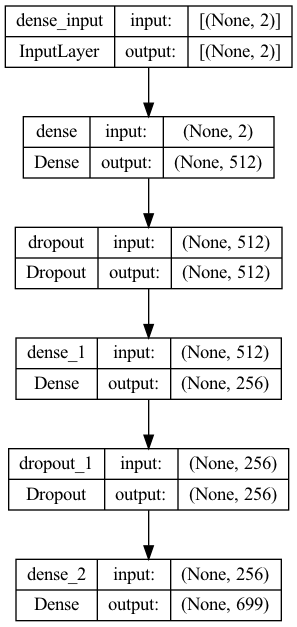

In [63]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_Age_BMI_'+ split_factor_file_train + '.png', show_shapes=True, show_layer_names=True)

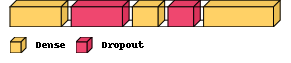

In [64]:
#import sys
#!{sys.executable} -m pip install visualkeras
import visualkeras

visualkeras.layered_view(model, legend=True) # without custom font




In [65]:
model.summary()

def myprint(s):
    with open('modelsummary_Age_BMI' + split_factor_file_train+ '.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 699)               179643    
                                                                 
Total params: 312,507
Trainable params: 312,507
Non-trainable params: 0
_________________________________________________________________


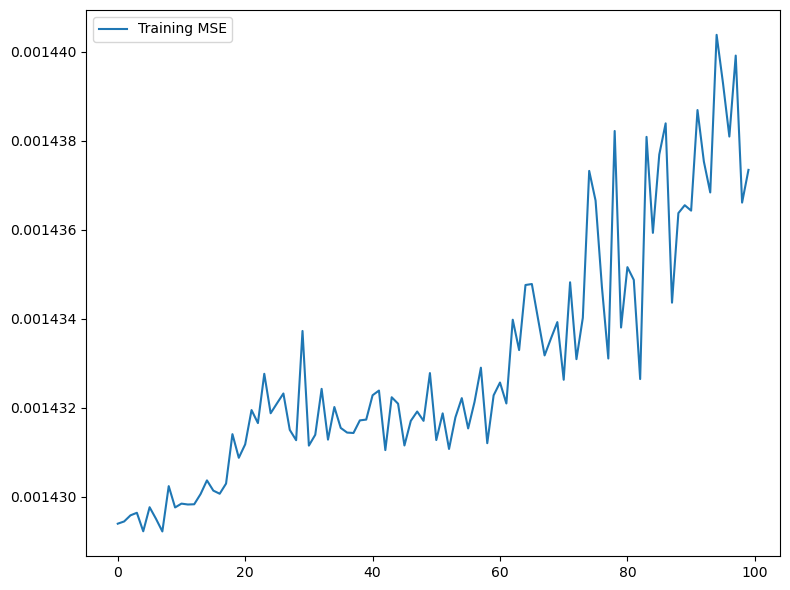

In [66]:


model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_mse"], 
        label="Training MSE")

ax.legend()

plt.tight_layout()
plt.show()

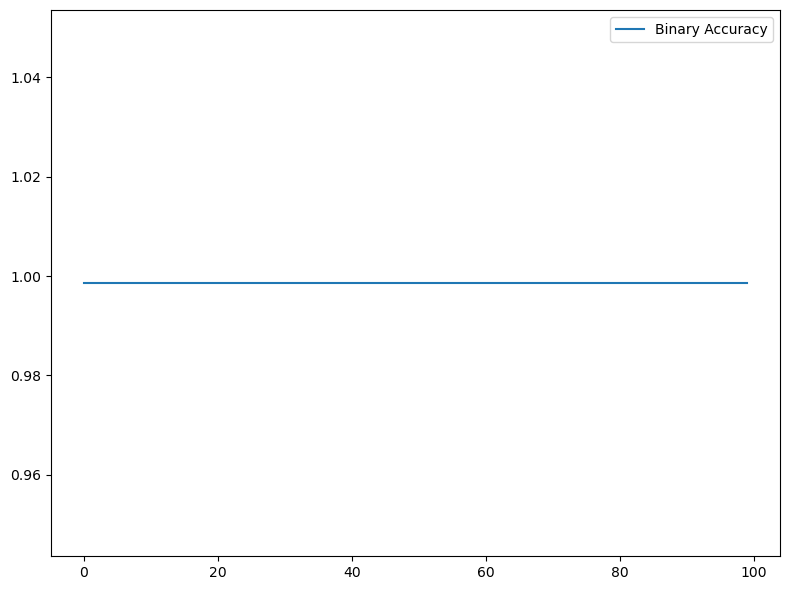

In [67]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_binary_accuracy"], 
        label="Binary Accuracy")

ax.legend()



plt.tight_layout()
plt.show()

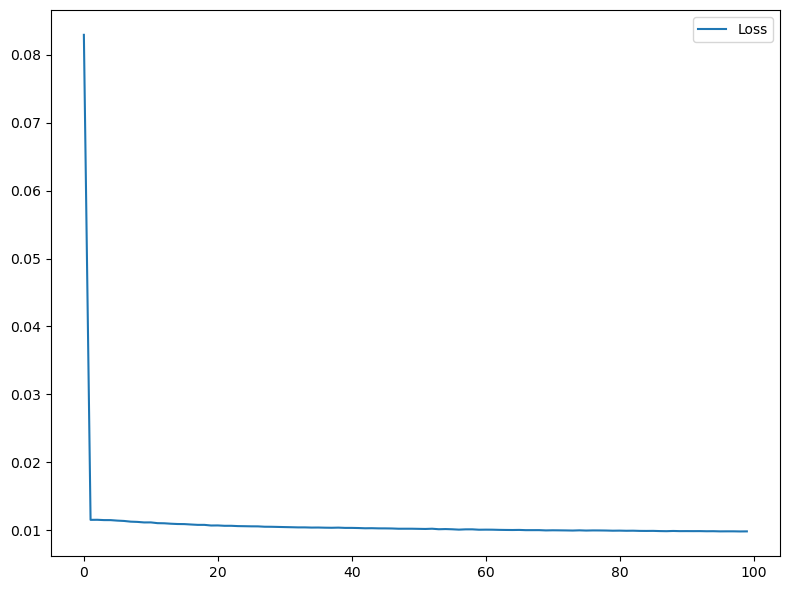

In [68]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Loss")

ax.legend()

plt.tight_layout()
plt.show()

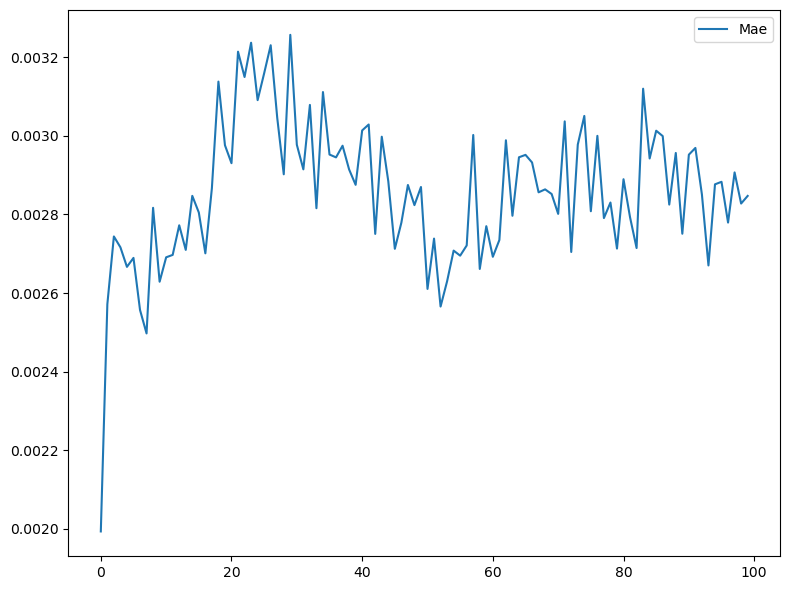

In [69]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Mae")

ax.legend()

plt.tight_layout()
plt.show()

In [70]:
#y_test is already ndarray
Z = Y_pred
print(Z.shape)
Y = Y_test
print(Y.shape)
M = confusion_matrix_article(Y,Z)
precision_M = precision_matrix(M)

(523, 699)
(523, 699)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
M is  (699, 699)
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  0
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  1
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  2
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  37
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  38
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  39
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0.

|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  80
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  81
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  82
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  125
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  126
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  127
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0

Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  169
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  170
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  171
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 = 

Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  213
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  214
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  215
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 = 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  257
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  258
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  259
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  302
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  303
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  304
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  346
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  347
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  348
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  391
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  392
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  393
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  436
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  437
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  438
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  480
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  481
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ... 0. 0. 0.]
Tem nan em C1
C1 =  [0. 0. 0. ... 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
|Yi\Zi| =  1.0 , shape =  (699,)
|Zi\Yi| =  0.0 , shape =  (699,)
i =  482
condiçao |Zi\Yi| =  0
kron: [0. 0. 0. ...

precision_M =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


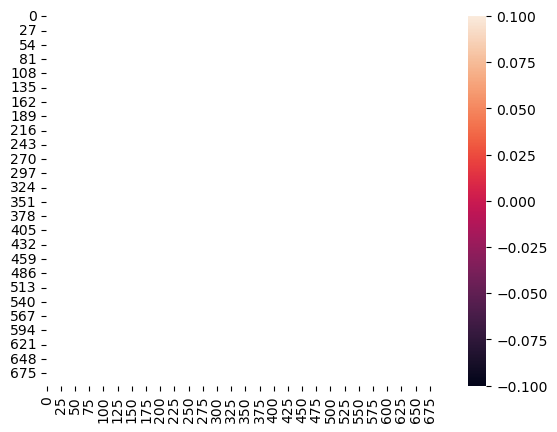

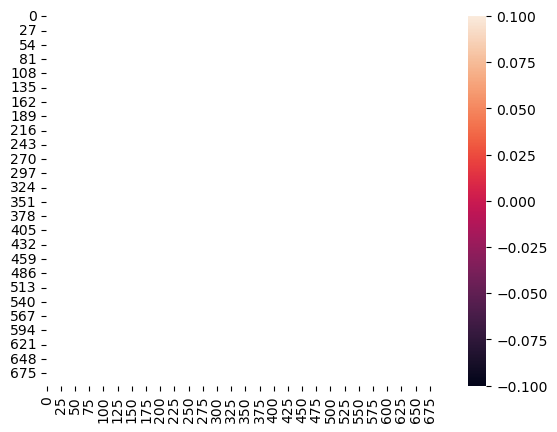

In [71]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(M, linewidth=0.5)
plt.show()

ax = sns.heatmap(precision_M, linewidth=0.5)
plt.show()

Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.0 . Min value:  0.0
Max value:  0.

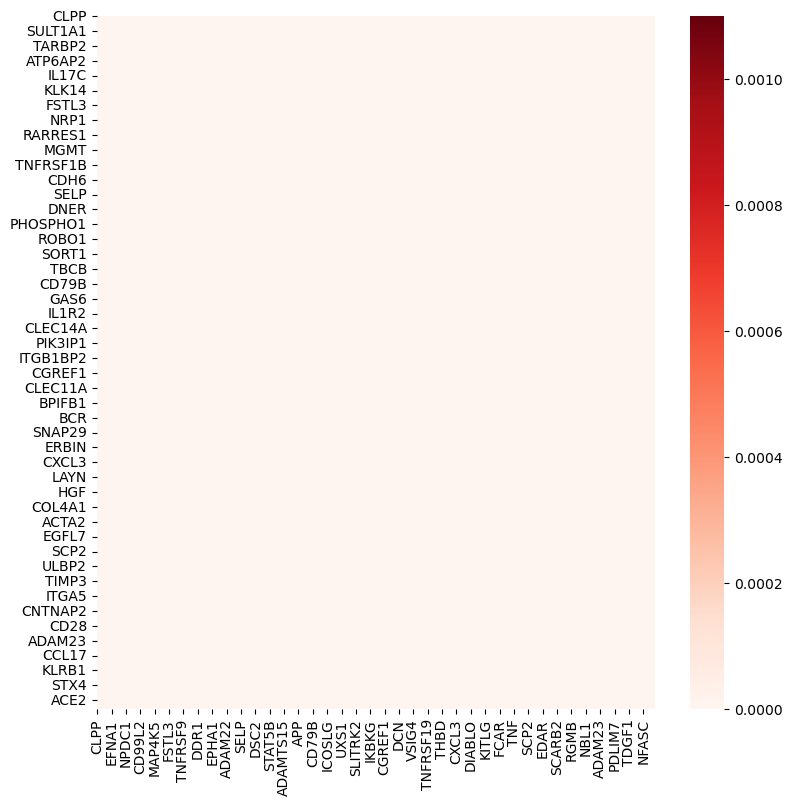

[]


<Figure size 640x480 with 0 Axes>

In [72]:
max_value = np.float64(0)
min_value = np.float64(0)


tp_indices_article = []


for row in range(0,len(precision_M)):
    #max_value = np.float64(max(precision_M[row,:]))
    
    
    #if(max(precision_M[row,:])>0):
    #    print(max(precision_M[row,:]>0))
    #else:
    #    print(max(precision_M[row,:]>0))
    if(max(precision_M[row,:])>0):
        tp_indices_article.append(row)
     
    if(max(precision_M[row,:])>max_value):
        if(max(precision_M[row,:])<1):
            max_value = np.float64(max(precision_M[row,:]))
            
    
    if(min(precision_M[row,:])>min_value):
        min_value = np.float64(min(precision_M[row,:]))
        
    print("Max value: ", max_value, ". Min value: ",min_value) 
    

if(max_value==0):
    max_value = np.float64(0.001)
    
plt.figure(figsize = (9,9))   
df_precision_M = pd.DataFrame(precision_M, columns = df.iloc[:,:-2].columns, index = df.iloc[:,:-2].columns )
df_precision_M
ax = sns.heatmap(df_precision_M,vmin=min_value, vmax=max_value*1.1, cmap="Reds")
plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Deep/CM_Deep_" + split_factor_file_train + "_article.eps", transparent=True, format='png')
plt.show()
plt.clf()


#rows que testaram true positive    
proteins_confusion_matrix_article = []
print(tp_indices_article)
if (len(tp_indices_article)>0):
    for i in tp_indices_article:
        proteins_confusion_matrix_article.append(df.columns[i])
        print(df.columns[i])
    proteins_confusion_matrix_article.append(max_value)
    pd.DataFrame(proteins_confusion_matrix_article).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Deep/true_positive_proteins_Age_BMI_" + split_factor_file_train + ".csv") 


In [73]:
# equivalent to print(hamming_loss(y_test, previsto.toarray())) 
print(hamming_loss(Y_test, Y_pred).numpy())
print(hamming_loss(Y_test, Y_pred).numpy()[0])

[0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062
 0.00143062 0.00143062 0.00143062 0.00143062 0.00143062 0.0014

<class 'numpy.ndarray'>
0.0
0.38912732474964234
0.38912732474964234
0.0
[[[523   0]
  [  0   0]]

 [[522   1]
  [  0   0]]

 [[523   0]
  [  0   0]]

 ...

 [[522   1]
  [  0   0]]

 [[522   1]
  [  0   0]]

 [[523   0]
  [  0   0]]]
[[[523   0]
  [  0   0]]

 [[522   0]
  [  1   0]]

 [[523   0]
  [  0   0]]

 ...

 [[522   0]
  [  1   0]]

 [[522   0]
  [  1   0]]

 [[523   0]
  [  0   0]]]
cm =  [[365054      0]
 [   523      0]]
699
427
[1, 3, 5, 7, 9, 10, 13, 14, 15, 17, 19, 20, 22, 24, 25, 26, 27, 29, 31, 32, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 57, 59, 61, 63, 64, 66, 67, 70, 73, 74, 75, 76, 77, 78, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 93, 95, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 115, 116, 117, 119, 121, 123, 124, 126, 127, 129, 130, 133, 137, 138, 141, 143, 144, 149, 150, 152, 154, 156, 160, 162, 163, 164, 165, 166, 167, 171, 174, 175, 176, 177, 180, 182, 184, 185, 186, 187, 190, 191, 193, 196, 197, 198, 200, 201, 203, 205

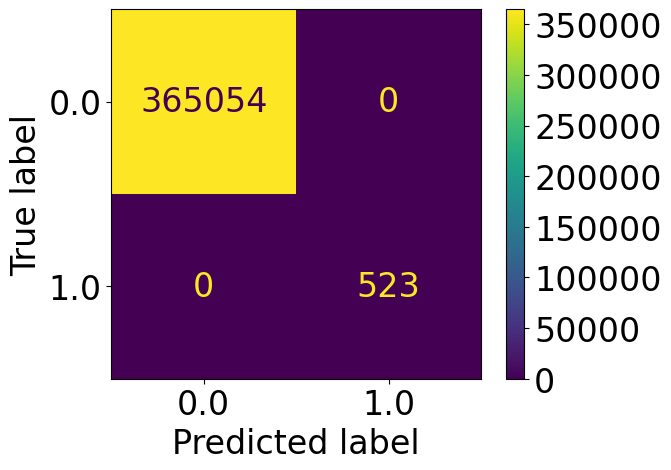

<Figure size 640x480 with 0 Axes>

In [74]:
# https://towardsdatascience.com/evaluating-multi-label-classifiers-a31be83da6ea 

from sklearn.metrics import multilabel_confusion_matrix
result = multilabel_confusion_matrix(Y_test, Y_pred)[0]
result = multilabel_confusion_matrix(Y_test, Y_pred)
result

print(type(Y_pred))

from sklearn.metrics import jaccard_score
print(jaccard_score(Y_pred,Y_test, average='samples', zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='macro',zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='weighted',zero_division=True))
print(jaccard_score(Y_pred,Y_test, average='micro',zero_division=True))

from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
print(multilabel_confusion_matrix(Y_pred,Y_test))


matrices = multilabel_confusion_matrix(Y_test, Y_pred)
print(matrices)

cm = confusion_matrix(Y_test.ravel(), Y_pred.ravel())
print("cm = ", cm)

plt.rcParams.update({'font.size': 24})
# Create a ConfusionMatrixDisplay object
#cmd = ConfusionMatrixDisplay(cm, display_labels=[f"Class {i}" for i in range(2)])
cmd = ConfusionMatrixDisplay.from_predictions(Y_test.ravel(), Y_test.ravel())
# Display the confusion matrix
cmd.plot()

plt.savefig("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Deep/CM_Deep_" + split_factor_file_train + "_flattened.eps", transparent=True, format='png',bbox_inches = 'tight')
plt.rcParams.update({'font.size': 10})
plt.clf()


num_classes = len(matrices)
print(num_classes)
# Initialize an empty list to store the true positive row indices
tp_indices = []
sum1 = 0
# Iterate over each class
for i in range(num_classes):
    # Get the confusion matrix for the current class
    class_cm = matrices[i]
    #print(class_cm)
    
    # Extract the true positive count from the confusion matrix
    tp = class_cm[1, 0]
   
    # If the true positive count is greater than 0, add the index to the list
    if tp > 0:
        sum1+=1
        tp_indices.append(i)

        
        
print(sum1)      
#rows que testaram true positive        
print(tp_indices)
proteins_confusion_matrix_flattened = []
if (len(tp_indices)>0):
    for i in tp_indices:
        print(df.columns[i])
        proteins_confusion_matrix_flattened.append(df.columns[i])
    pd.DataFrame(proteins_confusion_matrix_flattened).to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Deep/true_positive_proteins__flattened_Age_BMI_" + split_factor_file_train + ".csv") 
        

true_positive_indices = np.where(matrices[:, 1, 1] == 1)[0]
print(true_positive_indices)



In [75]:
df_model_scores = pd.read_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Scores_Age_BMI_"+split_factor_file_train+".csv")
df_model_scores = df_model_scores.drop(['Unnamed: 0'], axis=1)
df_model_scores.head(20)

,Model,Proportion,HL,Prec,Rec,F1,Jac
0,MLKNN,60_40,0.001431,1.000000,0.389127,0.389127,0.389127
1,HARAM,60_40,0.014965,0.805545,0.391750,0.303475,0.303387
2,BR_MultinomialNB,60_40,0.001431,1.000000,0.389127,0.389127,0.389127
3,Label Powerset GradientBooster,60_40,0.002861,0.991416,0.389127,0.384835,0.384835
4,ClassifierChain,60_40,0.002842,0.992859,0.390558,0.389151,0.389139
5,Label Powerset SVC,60_40,0.002861,0.994278,0.389127,0.387697,0.387697
6,RandomForest,60_40,0.001436,0.998569,0.389127,0.389127,0.389127
7,DecisionTree,60_40,0.001436,0.998569,0.389127,0.389127,0.389127
8,SVM,60_40,0.104853,0.541421,0.453743,0.205634,0.205155
9,BR_kNN,60_40,0.001431,1.000000,0.389127,0.389127,0.389127


In [76]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(Y_test, Y_pred, average='macro',zero_division=1))



#define rows to add
rows_to_append = pd.DataFrame([{'Model':'Deep', 'Proportion':split_factor_file_train, 
                                'HL':hamming_loss(Y_test, Y_pred).numpy()[0],
                               'Prec':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[0],
                               'Rec':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[1],
                               'F1':precision_recall_fscore_support(Y_pred,Y_test, average='macro',zero_division=1)[2],
                               'Jac':jaccard_score(Y_pred,Y_test, average='macro',zero_division=True)}])
                           

#add row to empty DataFrame
df_model_scores = pd.concat([df_model_scores, rows_to_append])
df_model_scores.head()

df_model_scores.to_csv("/Users/marcelo_palermo/Doutorado/R/Olink/NextSteps/Results/Age_BMI/ML Models/Scores_Age_BMI_" + split_factor_file_train + ".csv") 

(1.0, 0.38912732474964234, 0.38912732474964234, None)
